<a href="https://colab.research.google.com/github/vgorbikov/mldlvsu_labs/blob/main/Lab_1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
«Изучение особенностей устройства и функционирования простейшего
персептрона в контексте задачи классификации»

**Цель работы** — освоение ключевых принципов обучения с учителем, с
акцентом на решение задачи бинарной классификации. В ходе выполнения
работы исследуются особенности устройства и принципы функционирования
математической модели искусственного нейрона на примере решения
логических операций OR, AND и XOR.

## ЗАДАНИЕ
1. Осуществить обучение нейрона выполнению функции логического
«ИЛИ».
2. Осуществить попытку обучения одного нейрона выполнению функции
«Исключающего ИЛИ» (XOR) и посмотреть на результат.
3. Построить и обучить модель для решения функции «Исключающего
ИЛИ» (XOR).
4. Построить график активационной функции заданного вида (по
вариантам, по номеру в списке).

### Вариант 9
Активацтонная функция **Softmax** (область значений (0, 1)):
$$
f(x) = \frac{e^{x_i}}{\sum^J_{j=1} e^{x_j}}, i=1...J
$$
Где $J$ - размер входного вектора

## Решение

### Подготовка

In [107]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Вспомогательная функция для отрисовки границы решения
def plot_decision_boundary(model, X, y):
    X = X.numpy()
    y = y.numpy()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x_min, x_max, 500),
                           np.linspace(y_min, y_max, 500))
    x_in = np.c_[xx1.ravel(), xx2.ravel()]

    # Преобразуем данные для предсказания
    x_in_tensor = torch.tensor(x_in, dtype=torch.float32)
    with torch.no_grad():
        y_pred = model(x_in_tensor).numpy()

    y_pred = np.round(y_pred).reshape(xx1.shape)

    plt.contourf(xx1, xx2, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.pause(0.01)

In [166]:
# функция для обучения моделей
def train(model: nn.Module, x: torch.tensor, y: torch.tensor, epoch: int = 1000, lr: float = 1e-2, visualize: bool = True):
  model.train() # переключаем модель в режим обучения
  loss_f = nn.BCELoss() # задаём функцию ошибки
  optimizer = torch.optim.Adam(model.parameters(), lr=lr) # задаём оптимизатор

  for epoch_no in range(epoch):
    outputs = model(x)
    loss = loss_f(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch: {epoch_no}/{epoch}; Loss: {loss.item()}')

    if epoch_no%10 == 0 and visualize:
      plot_decision_boundary(model, x, y)

    if torch.round(outputs).eq(y).all():
        print('Training completed :)')
        plot_decision_boundary(model, x, y)
        break

  return model

In [122]:
# функция для тестирования
def test(model: nn.Module, x, y):
  model.eval()
  l = len(x)
  outs = model(x).round()

  good_answers = sum([1 for i in range(l) if outs[i] == y[i]])

  for i in range(l):
    print(f'{[int(n) for n in x[i]]} -> {int(outs[i])}')

  print(f'Test result: {good_answers}/{l}')

In [110]:
# Входные данные
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) # входные данные x1 и x2 (признаки, характеризующие объект)
Y_OR = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # желаемый выход для ИЛИ
Y_XOR = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # желаемый выход для исключающего ИЛИ

### 1. Учим один нейрон логическому ИЛИ

In [149]:
# Модель с одним нейроном
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
      z = self.fc(x)
      p = torch.sigmoid(z) # тут softmax использовать бессмысленно
      return p

Epoch: 0/1000; Loss: 0.7462469935417175


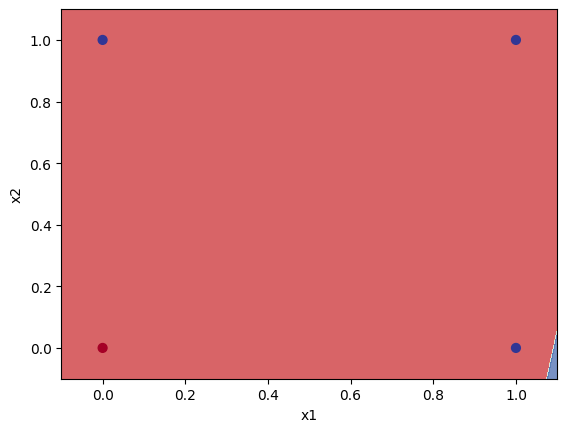

Epoch: 1/1000; Loss: 0.7374739646911621
Epoch: 2/1000; Loss: 0.7288139462471008
Epoch: 3/1000; Loss: 0.7202693223953247
Epoch: 4/1000; Loss: 0.7118419408798218
Epoch: 5/1000; Loss: 0.7035338282585144
Epoch: 6/1000; Loss: 0.6953467726707458
Epoch: 7/1000; Loss: 0.6872822642326355
Epoch: 8/1000; Loss: 0.6793419122695923
Epoch: 9/1000; Loss: 0.6715270280838013
Epoch: 10/1000; Loss: 0.6638389825820923


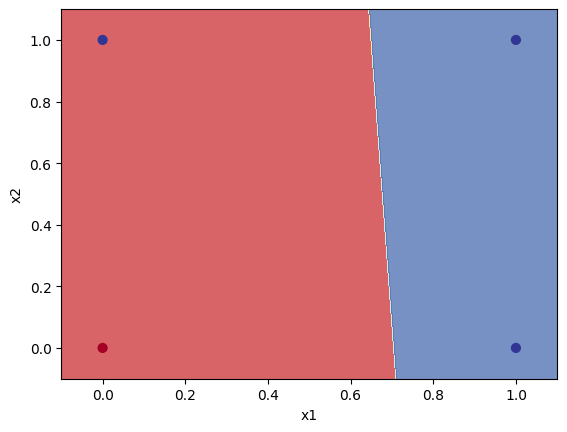

Epoch: 11/1000; Loss: 0.656278669834137
Epoch: 12/1000; Loss: 0.6488469839096069
Epoch: 13/1000; Loss: 0.6415449380874634
Epoch: 14/1000; Loss: 0.6343730092048645
Epoch: 15/1000; Loss: 0.6273314952850342
Epoch: 16/1000; Loss: 0.6204208135604858
Epoch: 17/1000; Loss: 0.6136411428451538
Epoch: 18/1000; Loss: 0.6069923639297485
Epoch: 19/1000; Loss: 0.6004743576049805
Epoch: 20/1000; Loss: 0.594086766242981


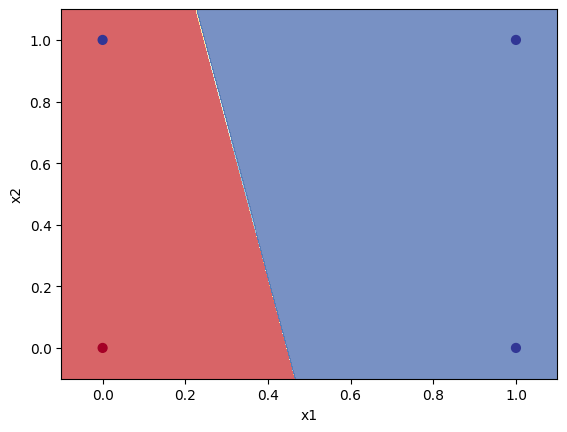

Epoch: 21/1000; Loss: 0.5878291130065918
Epoch: 22/1000; Loss: 0.58170086145401
Epoch: 23/1000; Loss: 0.5757012367248535
Epoch: 24/1000; Loss: 0.5698293447494507
Epoch: 25/1000; Loss: 0.5640841722488403
Epoch: 26/1000; Loss: 0.5584647059440613
Epoch: 27/1000; Loss: 0.5529695749282837
Epoch: 28/1000; Loss: 0.5475975275039673
Epoch: 29/1000; Loss: 0.5423470139503479
Epoch: 30/1000; Loss: 0.5372166633605957


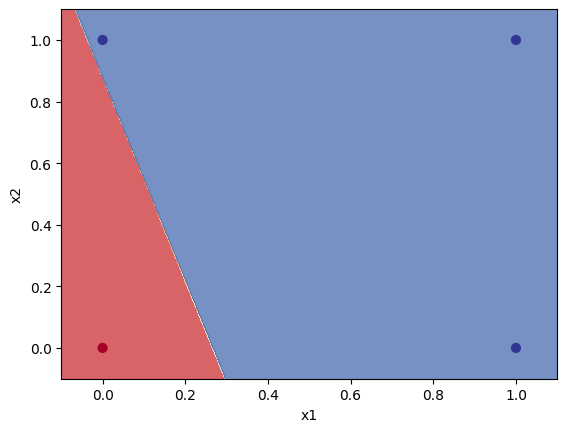

Training completed :)


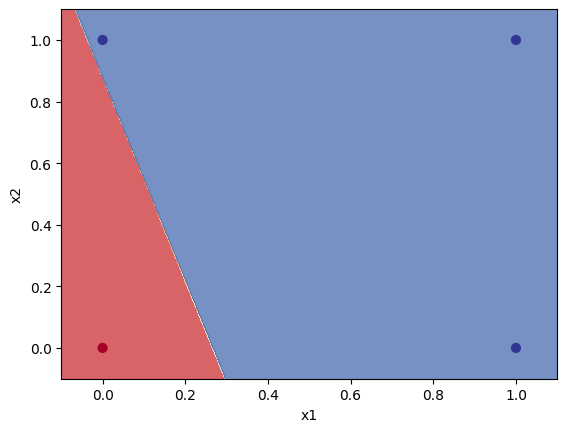

In [174]:
so_so_model = Perceptron(input_size=2)
so_so_model = train(so_so_model, X, Y_OR)

In [175]:
test(so_so_model, X, Y_OR)

[0, 0] -> 0
[0, 1] -> 1
[1, 0] -> 1
[1, 1] -> 1
Test result: 4/4


### 2. Учим один нейрон исключающему ИЛИ (попытка обречена на провал)

Epoch: 0/1000; Loss: 0.7213369607925415


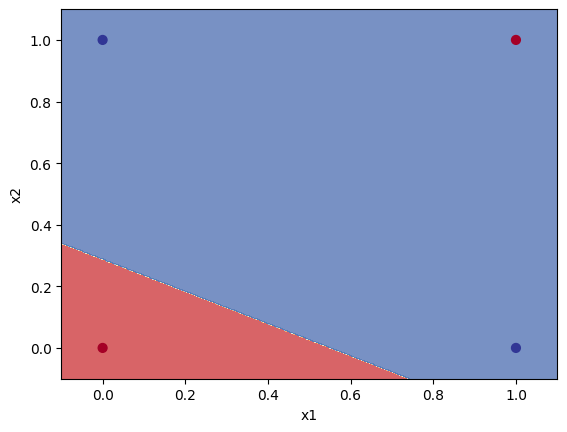

Epoch: 1/1000; Loss: 0.7192827463150024
Epoch: 2/1000; Loss: 0.7173351049423218
Epoch: 3/1000; Loss: 0.715496301651001
Epoch: 4/1000; Loss: 0.7137683629989624
Epoch: 5/1000; Loss: 0.7121528387069702
Epoch: 6/1000; Loss: 0.7106505632400513
Epoch: 7/1000; Loss: 0.7092622518539429
Epoch: 8/1000; Loss: 0.7079874873161316
Epoch: 9/1000; Loss: 0.7068256139755249
Epoch: 10/1000; Loss: 0.7057746648788452


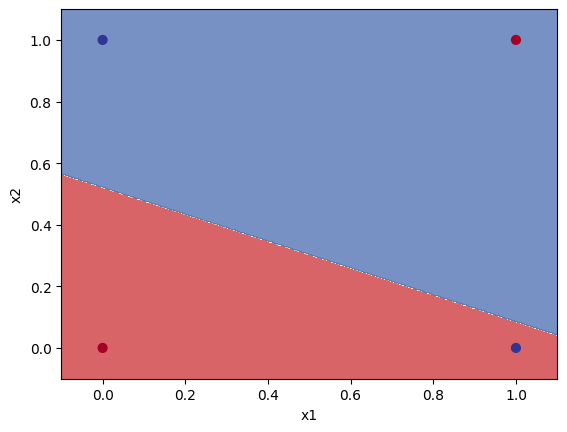

Epoch: 11/1000; Loss: 0.7048323154449463
Epoch: 12/1000; Loss: 0.7039952278137207
Epoch: 13/1000; Loss: 0.7032589912414551
Epoch: 14/1000; Loss: 0.7026187181472778
Epoch: 15/1000; Loss: 0.7020682096481323
Epoch: 16/1000; Loss: 0.7016006708145142
Epoch: 17/1000; Loss: 0.7012085914611816
Epoch: 18/1000; Loss: 0.7008838653564453
Epoch: 19/1000; Loss: 0.7006180286407471
Epoch: 20/1000; Loss: 0.7004023790359497


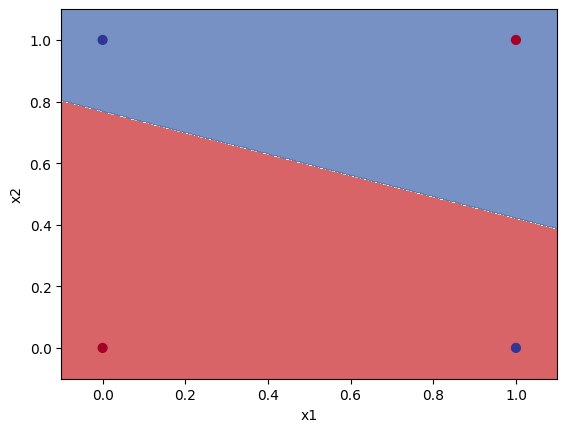

Epoch: 21/1000; Loss: 0.7002279758453369
Epoch: 22/1000; Loss: 0.7000865936279297
Epoch: 23/1000; Loss: 0.6999701261520386
Epoch: 24/1000; Loss: 0.6998710632324219
Epoch: 25/1000; Loss: 0.6997827887535095
Epoch: 26/1000; Loss: 0.6996997594833374
Epoch: 27/1000; Loss: 0.6996170282363892
Epoch: 28/1000; Loss: 0.6995310187339783
Epoch: 29/1000; Loss: 0.6994388699531555
Epoch: 30/1000; Loss: 0.6993389129638672


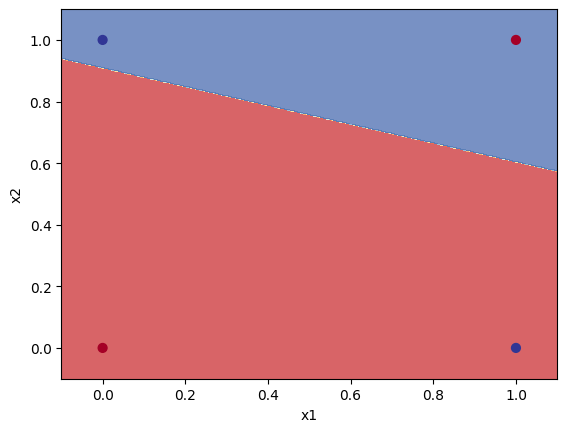

Epoch: 31/1000; Loss: 0.6992300152778625
Epoch: 32/1000; Loss: 0.699111819267273
Epoch: 33/1000; Loss: 0.6989847421646118
Epoch: 34/1000; Loss: 0.698849618434906
Epoch: 35/1000; Loss: 0.6987075209617615
Epoch: 36/1000; Loss: 0.6985598802566528
Epoch: 37/1000; Loss: 0.698408305644989
Epoch: 38/1000; Loss: 0.6982540488243103
Epoch: 39/1000; Loss: 0.6980990171432495
Epoch: 40/1000; Loss: 0.6979445219039917


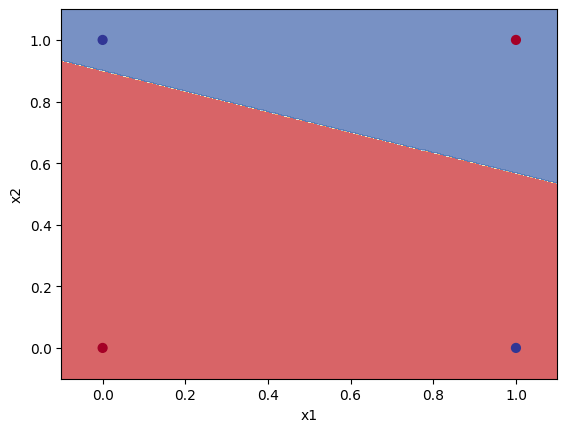

Epoch: 41/1000; Loss: 0.6977918148040771
Epoch: 42/1000; Loss: 0.6976420879364014
Epoch: 43/1000; Loss: 0.6974961161613464
Epoch: 44/1000; Loss: 0.697354793548584
Epoch: 45/1000; Loss: 0.6972185373306274
Epoch: 46/1000; Loss: 0.6970875859260559
Epoch: 47/1000; Loss: 0.6969621181488037
Epoch: 48/1000; Loss: 0.6968420147895813
Epoch: 49/1000; Loss: 0.6967270970344543
Epoch: 50/1000; Loss: 0.6966171860694885


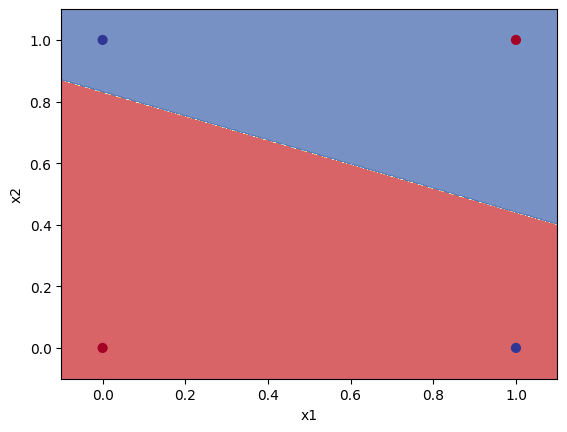

Epoch: 51/1000; Loss: 0.6965117454528809
Epoch: 52/1000; Loss: 0.6964104175567627
Epoch: 53/1000; Loss: 0.6963127255439758
Epoch: 54/1000; Loss: 0.6962182521820068
Epoch: 55/1000; Loss: 0.6961265802383423
Epoch: 56/1000; Loss: 0.6960374712944031
Epoch: 57/1000; Loss: 0.6959502696990967
Epoch: 58/1000; Loss: 0.6958649754524231
Epoch: 59/1000; Loss: 0.6957811713218689
Epoch: 60/1000; Loss: 0.6956988573074341


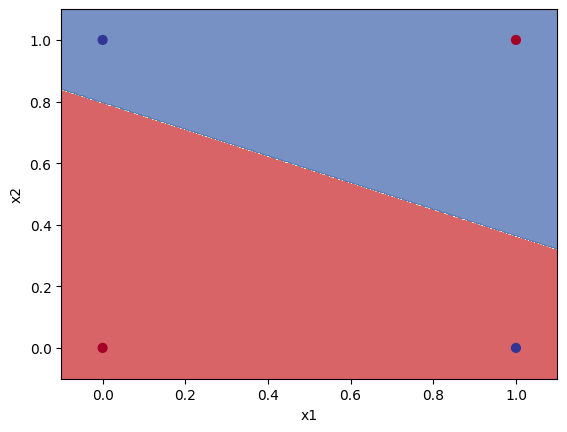

Epoch: 61/1000; Loss: 0.6956178545951843
Epoch: 62/1000; Loss: 0.6955382823944092
Epoch: 63/1000; Loss: 0.6954599618911743
Epoch: 64/1000; Loss: 0.6953829526901245
Epoch: 65/1000; Loss: 0.6953074336051941
Epoch: 66/1000; Loss: 0.6952334642410278
Epoch: 67/1000; Loss: 0.695160984992981
Epoch: 68/1000; Loss: 0.6950901746749878
Epoch: 69/1000; Loss: 0.6950211524963379
Epoch: 70/1000; Loss: 0.6949540972709656


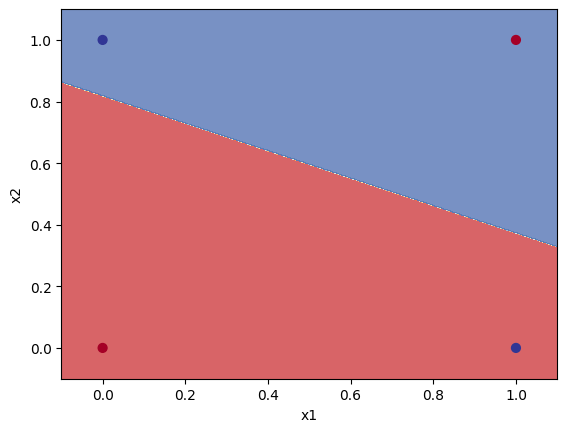

Epoch: 71/1000; Loss: 0.6948888301849365
Epoch: 72/1000; Loss: 0.6948254108428955
Epoch: 73/1000; Loss: 0.6947640776634216
Epoch: 74/1000; Loss: 0.6947046518325806
Epoch: 75/1000; Loss: 0.6946471333503723
Epoch: 76/1000; Loss: 0.6945914030075073
Epoch: 77/1000; Loss: 0.6945376396179199
Epoch: 78/1000; Loss: 0.6944854855537415
Epoch: 79/1000; Loss: 0.6944350600242615
Epoch: 80/1000; Loss: 0.6943864822387695


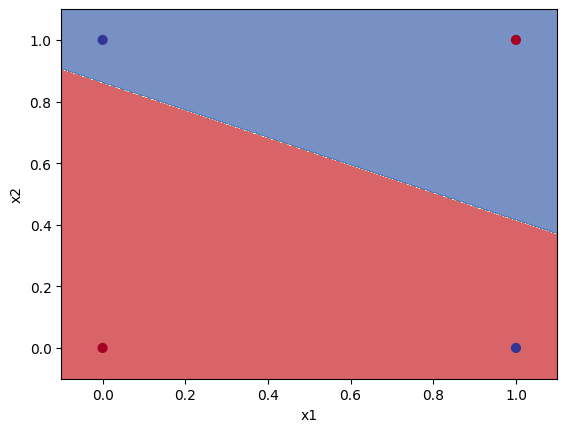

Epoch: 81/1000; Loss: 0.6943392753601074
Epoch: 82/1000; Loss: 0.6942936182022095
Epoch: 83/1000; Loss: 0.6942494511604309
Epoch: 84/1000; Loss: 0.6942066550254822
Epoch: 85/1000; Loss: 0.6941652297973633
Epoch: 86/1000; Loss: 0.6941250562667847
Epoch: 87/1000; Loss: 0.6940862536430359
Epoch: 88/1000; Loss: 0.6940485239028931
Epoch: 89/1000; Loss: 0.6940120458602905
Epoch: 90/1000; Loss: 0.6939767599105835


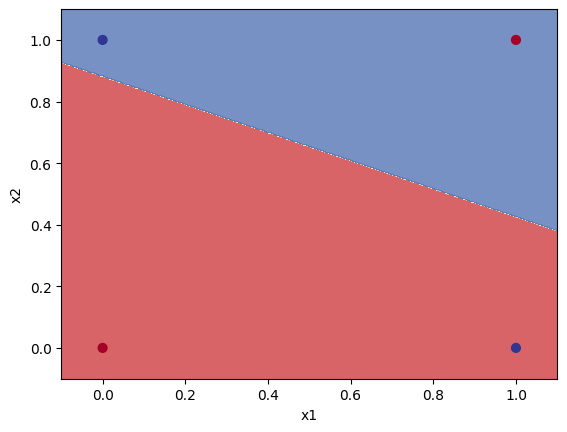

Epoch: 91/1000; Loss: 0.693942666053772
Epoch: 92/1000; Loss: 0.6939097046852112
Epoch: 93/1000; Loss: 0.6938778162002563
Epoch: 94/1000; Loss: 0.6938470602035522
Epoch: 95/1000; Loss: 0.6938174366950989
Epoch: 96/1000; Loss: 0.6937887668609619
Epoch: 97/1000; Loss: 0.6937611699104309
Epoch: 98/1000; Loss: 0.6937347650527954
Epoch: 99/1000; Loss: 0.693709135055542
Epoch: 100/1000; Loss: 0.6936845183372498


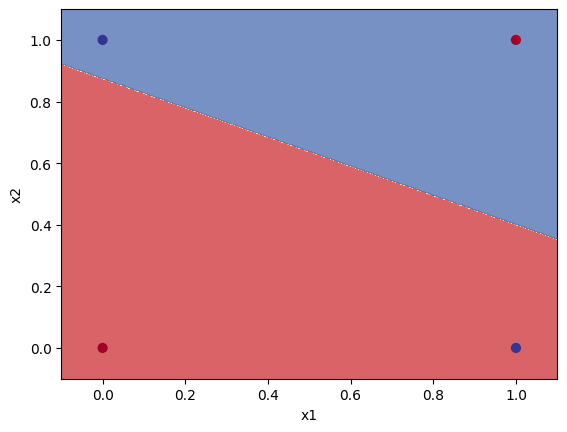

Epoch: 101/1000; Loss: 0.6936609148979187
Epoch: 102/1000; Loss: 0.6936382055282593
Epoch: 103/1000; Loss: 0.6936162710189819
Epoch: 104/1000; Loss: 0.6935952305793762
Epoch: 105/1000; Loss: 0.6935750842094421
Epoch: 106/1000; Loss: 0.6935556530952454
Epoch: 107/1000; Loss: 0.6935369968414307
Epoch: 108/1000; Loss: 0.6935190558433533
Epoch: 109/1000; Loss: 0.6935018301010132
Epoch: 110/1000; Loss: 0.6934853196144104


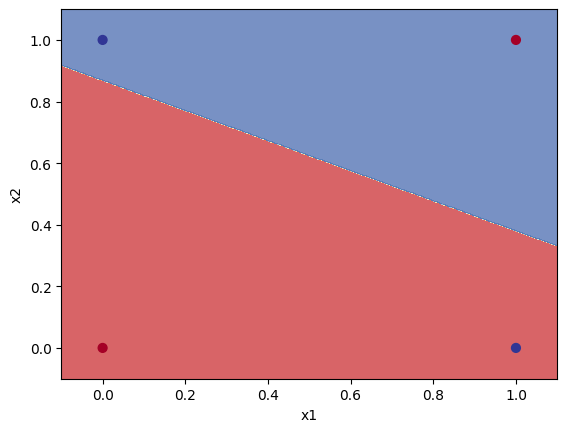

Epoch: 111/1000; Loss: 0.6934695243835449
Epoch: 112/1000; Loss: 0.6934543251991272
Epoch: 113/1000; Loss: 0.6934397220611572
Epoch: 114/1000; Loss: 0.693425714969635
Epoch: 115/1000; Loss: 0.6934123039245605
Epoch: 116/1000; Loss: 0.6933994889259338
Epoch: 117/1000; Loss: 0.6933871507644653
Epoch: 118/1000; Loss: 0.6933754086494446
Epoch: 119/1000; Loss: 0.6933642029762268
Epoch: 120/1000; Loss: 0.6933534145355225


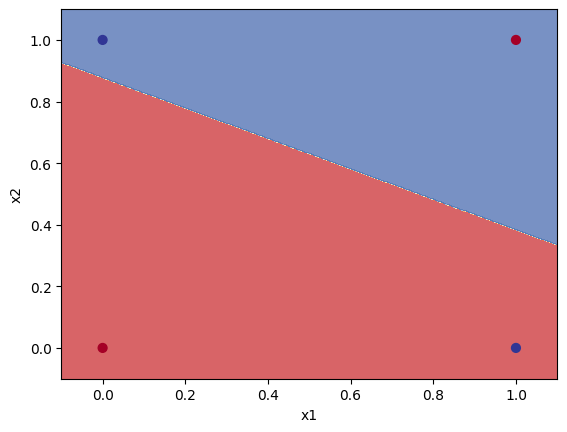

Epoch: 121/1000; Loss: 0.6933431029319763
Epoch: 122/1000; Loss: 0.6933332681655884
Epoch: 123/1000; Loss: 0.6933239102363586
Epoch: 124/1000; Loss: 0.6933149099349976
Epoch: 125/1000; Loss: 0.6933062672615051
Epoch: 126/1000; Loss: 0.6932981610298157
Epoch: 127/1000; Loss: 0.6932903528213501
Epoch: 128/1000; Loss: 0.6932828426361084
Epoch: 129/1000; Loss: 0.6932757496833801
Epoch: 130/1000; Loss: 0.6932690143585205


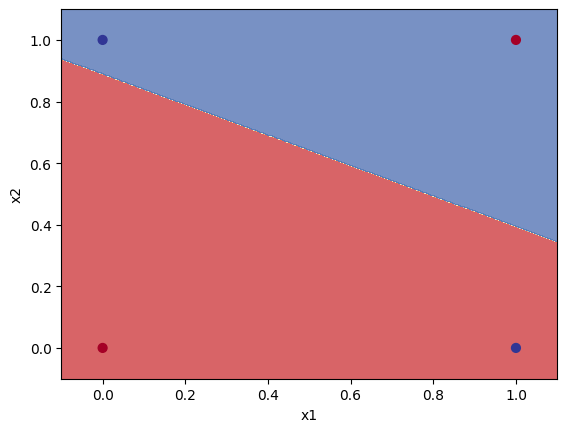

Epoch: 131/1000; Loss: 0.6932625770568848
Epoch: 132/1000; Loss: 0.6932563781738281
Epoch: 133/1000; Loss: 0.6932505369186401
Epoch: 134/1000; Loss: 0.6932450532913208
Epoch: 135/1000; Loss: 0.693239688873291
Epoch: 136/1000; Loss: 0.6932346820831299
Epoch: 137/1000; Loss: 0.6932298541069031
Epoch: 138/1000; Loss: 0.6932252645492554
Epoch: 139/1000; Loss: 0.6932209730148315
Epoch: 140/1000; Loss: 0.693216860294342


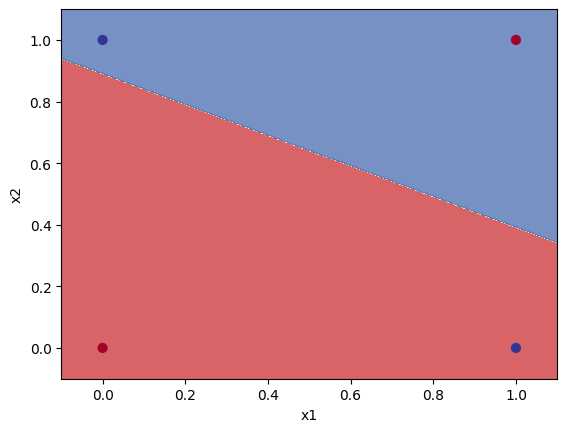

Epoch: 141/1000; Loss: 0.6932129859924316
Epoch: 142/1000; Loss: 0.693209171295166
Epoch: 143/1000; Loss: 0.693205714225769
Epoch: 144/1000; Loss: 0.6932023763656616
Epoch: 145/1000; Loss: 0.6931992173194885
Epoch: 146/1000; Loss: 0.6931962370872498
Epoch: 147/1000; Loss: 0.6931934356689453
Epoch: 148/1000; Loss: 0.6931906938552856
Epoch: 149/1000; Loss: 0.6931881904602051
Epoch: 150/1000; Loss: 0.6931856870651245


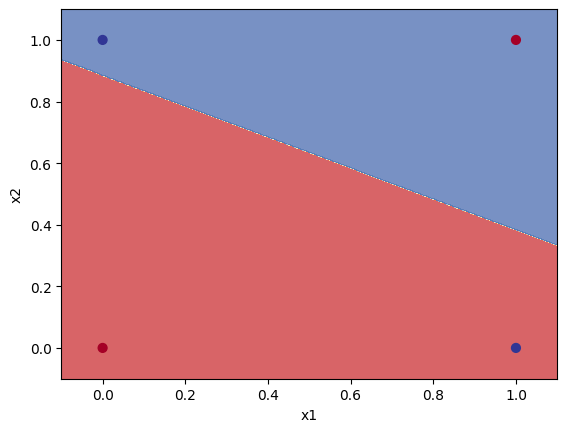

Epoch: 151/1000; Loss: 0.6931834816932678
Epoch: 152/1000; Loss: 0.6931813359260559
Epoch: 153/1000; Loss: 0.6931792497634888
Epoch: 154/1000; Loss: 0.693177342414856
Epoch: 155/1000; Loss: 0.6931754946708679
Epoch: 156/1000; Loss: 0.6931737661361694
Epoch: 157/1000; Loss: 0.6931722164154053
Epoch: 158/1000; Loss: 0.6931706666946411
Epoch: 159/1000; Loss: 0.6931691765785217
Epoch: 160/1000; Loss: 0.6931677460670471


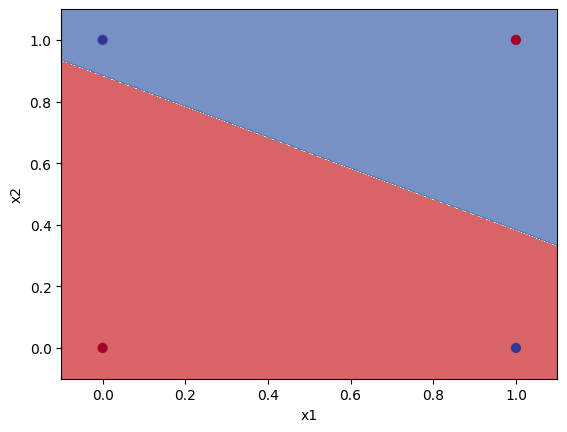

Epoch: 161/1000; Loss: 0.6931664943695068
Epoch: 162/1000; Loss: 0.6931652426719666
Epoch: 163/1000; Loss: 0.6931641697883606
Epoch: 164/1000; Loss: 0.6931630969047546
Epoch: 165/1000; Loss: 0.6931620240211487
Epoch: 166/1000; Loss: 0.6931610703468323
Epoch: 167/1000; Loss: 0.6931602358818054
Epoch: 168/1000; Loss: 0.6931593418121338
Epoch: 169/1000; Loss: 0.6931585073471069
Epoch: 170/1000; Loss: 0.6931577920913696


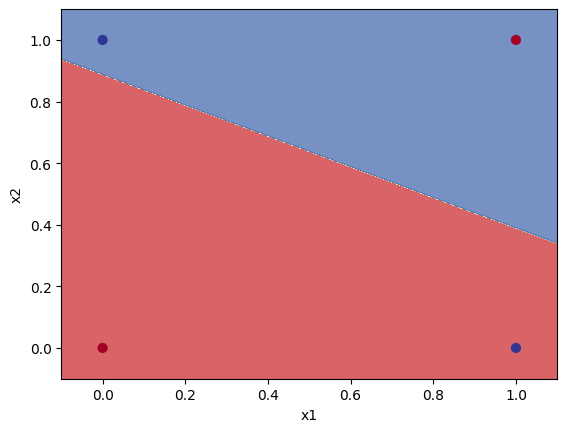

Epoch: 171/1000; Loss: 0.6931570768356323
Epoch: 172/1000; Loss: 0.6931564211845398
Epoch: 173/1000; Loss: 0.6931558847427368
Epoch: 174/1000; Loss: 0.6931551694869995
Epoch: 175/1000; Loss: 0.6931546926498413
Epoch: 176/1000; Loss: 0.6931542158126831
Epoch: 177/1000; Loss: 0.6931536793708801
Epoch: 178/1000; Loss: 0.6931532621383667
Epoch: 179/1000; Loss: 0.6931528449058533
Epoch: 180/1000; Loss: 0.6931524276733398


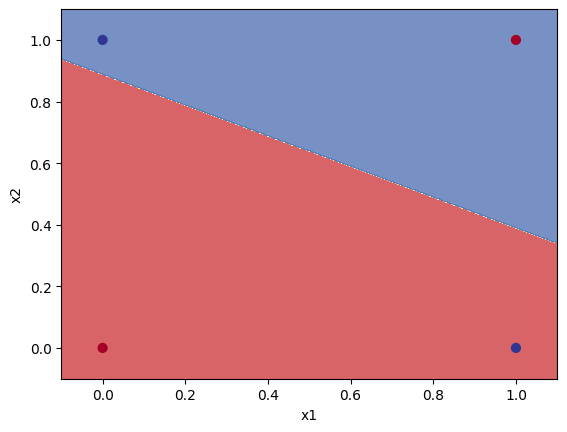

Epoch: 181/1000; Loss: 0.6931520700454712
Epoch: 182/1000; Loss: 0.6931517124176025
Epoch: 183/1000; Loss: 0.6931513547897339
Epoch: 184/1000; Loss: 0.6931511163711548
Epoch: 185/1000; Loss: 0.6931508779525757
Epoch: 186/1000; Loss: 0.6931505799293518
Epoch: 187/1000; Loss: 0.6931504011154175
Epoch: 188/1000; Loss: 0.6931500434875488
Epoch: 189/1000; Loss: 0.6931499242782593
Epoch: 190/1000; Loss: 0.6931496858596802


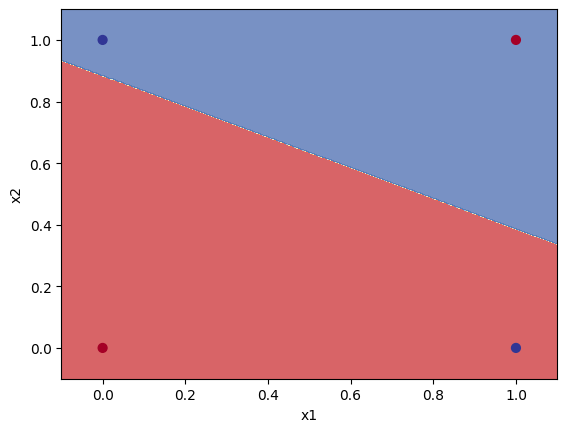

Epoch: 191/1000; Loss: 0.6931495070457458
Epoch: 192/1000; Loss: 0.6931493282318115
Epoch: 193/1000; Loss: 0.6931490898132324
Epoch: 194/1000; Loss: 0.6931489706039429
Epoch: 195/1000; Loss: 0.6931488513946533
Epoch: 196/1000; Loss: 0.6931487321853638
Epoch: 197/1000; Loss: 0.6931486129760742
Epoch: 198/1000; Loss: 0.6931486129760742
Epoch: 199/1000; Loss: 0.6931483745574951
Epoch: 200/1000; Loss: 0.6931483745574951


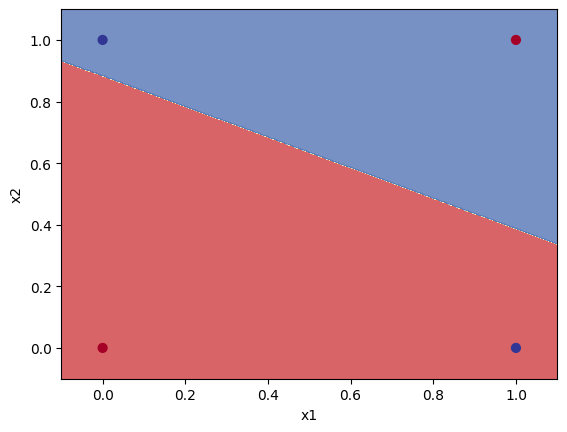

Epoch: 201/1000; Loss: 0.6931482553482056
Epoch: 202/1000; Loss: 0.6931481957435608
Epoch: 203/1000; Loss: 0.6931480765342712
Epoch: 204/1000; Loss: 0.6931480169296265
Epoch: 205/1000; Loss: 0.6931478977203369
Epoch: 206/1000; Loss: 0.6931478381156921
Epoch: 207/1000; Loss: 0.6931478381156921
Epoch: 208/1000; Loss: 0.6931478381156921
Epoch: 209/1000; Loss: 0.6931477189064026
Epoch: 210/1000; Loss: 0.6931476593017578


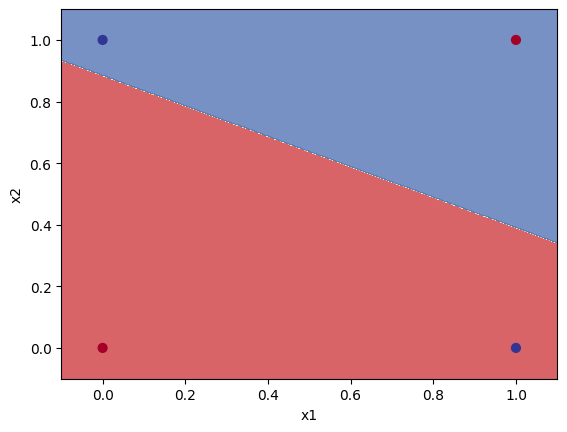

Epoch: 211/1000; Loss: 0.6931476593017578
Epoch: 212/1000; Loss: 0.693147599697113
Epoch: 213/1000; Loss: 0.6931475400924683
Epoch: 214/1000; Loss: 0.693147599697113
Epoch: 215/1000; Loss: 0.6931475400924683
Epoch: 216/1000; Loss: 0.6931475400924683
Epoch: 217/1000; Loss: 0.6931474208831787
Epoch: 218/1000; Loss: 0.6931473612785339
Epoch: 219/1000; Loss: 0.6931474208831787
Epoch: 220/1000; Loss: 0.6931474208831787


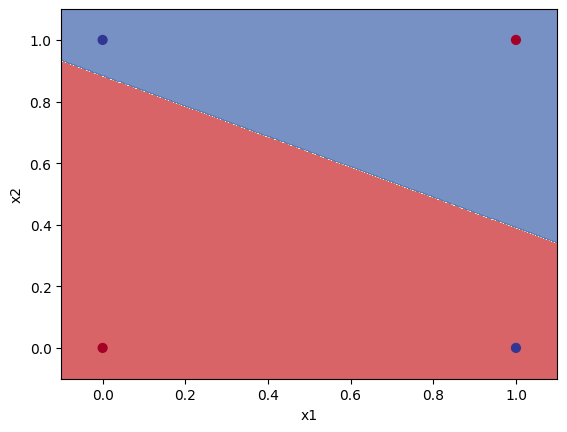

Epoch: 221/1000; Loss: 0.6931473016738892
Epoch: 222/1000; Loss: 0.6931473612785339
Epoch: 223/1000; Loss: 0.6931473612785339
Epoch: 224/1000; Loss: 0.6931473016738892
Epoch: 225/1000; Loss: 0.6931473016738892
Epoch: 226/1000; Loss: 0.6931473016738892
Epoch: 227/1000; Loss: 0.6931473016738892
Epoch: 228/1000; Loss: 0.6931473016738892
Epoch: 229/1000; Loss: 0.6931473016738892
Epoch: 230/1000; Loss: 0.6931473016738892


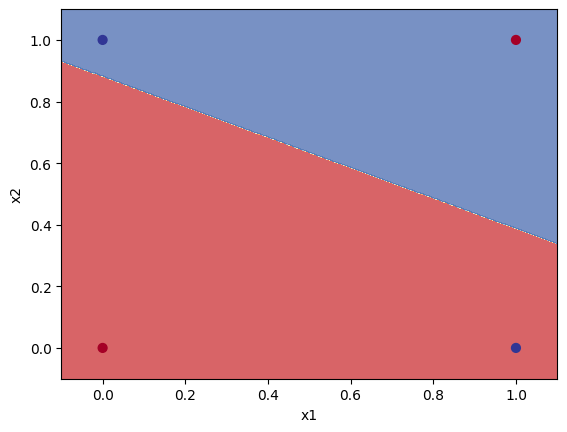

Epoch: 231/1000; Loss: 0.6931472420692444
Epoch: 232/1000; Loss: 0.6931472420692444
Epoch: 233/1000; Loss: 0.6931473016738892
Epoch: 234/1000; Loss: 0.6931471824645996
Epoch: 235/1000; Loss: 0.6931472420692444
Epoch: 236/1000; Loss: 0.6931472420692444
Epoch: 237/1000; Loss: 0.6931471824645996
Epoch: 238/1000; Loss: 0.6931472420692444
Epoch: 239/1000; Loss: 0.6931472420692444
Epoch: 240/1000; Loss: 0.6931472420692444


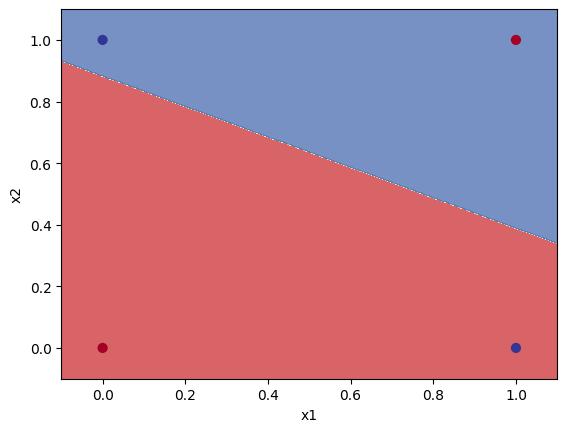

Epoch: 241/1000; Loss: 0.6931472420692444
Epoch: 242/1000; Loss: 0.6931472420692444
Epoch: 243/1000; Loss: 0.6931472420692444
Epoch: 244/1000; Loss: 0.6931471824645996
Epoch: 245/1000; Loss: 0.6931471824645996
Epoch: 246/1000; Loss: 0.6931471824645996
Epoch: 247/1000; Loss: 0.6931471824645996
Epoch: 248/1000; Loss: 0.6931471824645996
Epoch: 249/1000; Loss: 0.6931471824645996
Epoch: 250/1000; Loss: 0.6931471824645996


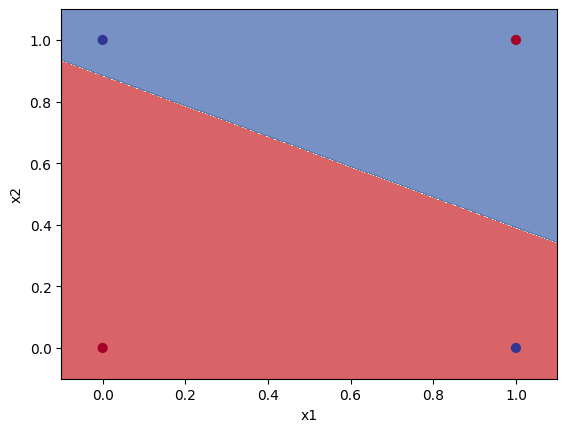

Epoch: 251/1000; Loss: 0.6931471824645996
Epoch: 252/1000; Loss: 0.6931471824645996
Epoch: 253/1000; Loss: 0.6931471824645996
Epoch: 254/1000; Loss: 0.6931471824645996
Epoch: 255/1000; Loss: 0.6931471824645996
Epoch: 256/1000; Loss: 0.6931471824645996
Epoch: 257/1000; Loss: 0.6931471824645996
Epoch: 258/1000; Loss: 0.6931471824645996
Epoch: 259/1000; Loss: 0.6931471824645996
Epoch: 260/1000; Loss: 0.6931471824645996


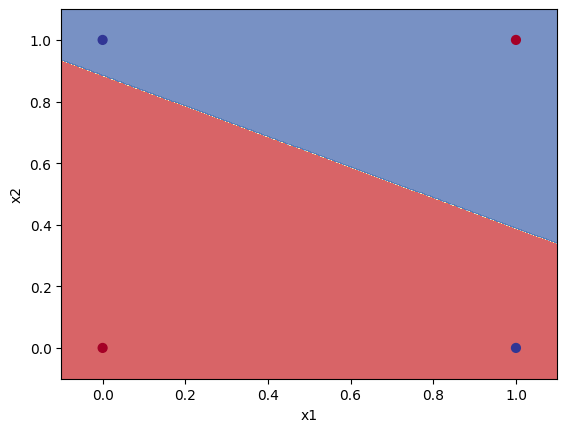

Epoch: 261/1000; Loss: 0.6931471824645996
Epoch: 262/1000; Loss: 0.6931471824645996
Epoch: 263/1000; Loss: 0.6931471228599548
Epoch: 264/1000; Loss: 0.6931471228599548
Epoch: 265/1000; Loss: 0.6931471824645996
Epoch: 266/1000; Loss: 0.6931471824645996
Epoch: 267/1000; Loss: 0.6931471824645996
Epoch: 268/1000; Loss: 0.6931471824645996
Epoch: 269/1000; Loss: 0.6931471824645996
Epoch: 270/1000; Loss: 0.6931471824645996


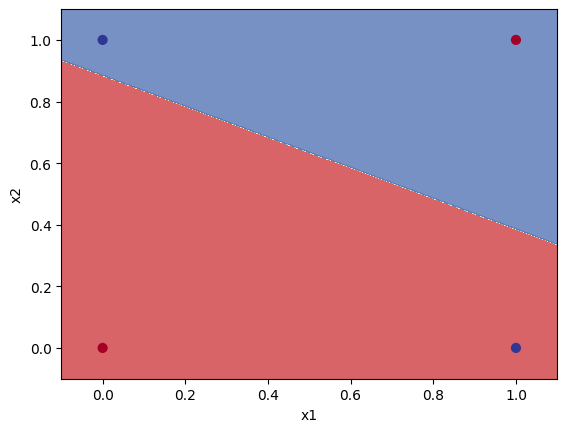

Epoch: 271/1000; Loss: 0.6931471228599548
Epoch: 272/1000; Loss: 0.6931471228599548
Epoch: 273/1000; Loss: 0.6931471824645996
Epoch: 274/1000; Loss: 0.6931471824645996
Epoch: 275/1000; Loss: 0.6931471824645996
Epoch: 276/1000; Loss: 0.6931471824645996
Epoch: 277/1000; Loss: 0.6931471824645996
Epoch: 278/1000; Loss: 0.6931471824645996
Epoch: 279/1000; Loss: 0.6931471228599548
Epoch: 280/1000; Loss: 0.6931471824645996


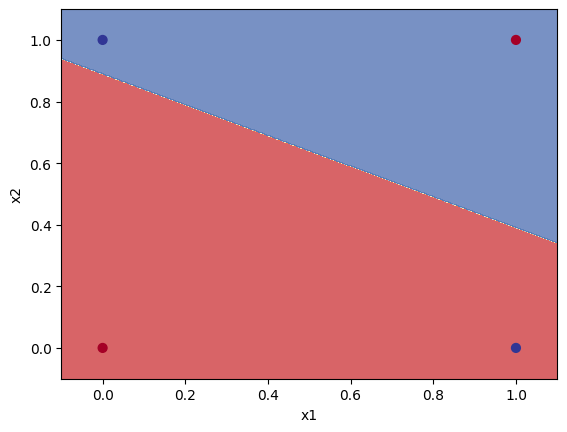

Epoch: 281/1000; Loss: 0.6931471824645996
Epoch: 282/1000; Loss: 0.6931471824645996
Epoch: 283/1000; Loss: 0.6931471824645996
Epoch: 284/1000; Loss: 0.6931471824645996
Epoch: 285/1000; Loss: 0.6931471824645996
Epoch: 286/1000; Loss: 0.6931471824645996
Epoch: 287/1000; Loss: 0.6931471824645996
Epoch: 288/1000; Loss: 0.6931471824645996
Epoch: 289/1000; Loss: 0.6931471824645996
Epoch: 290/1000; Loss: 0.6931471824645996


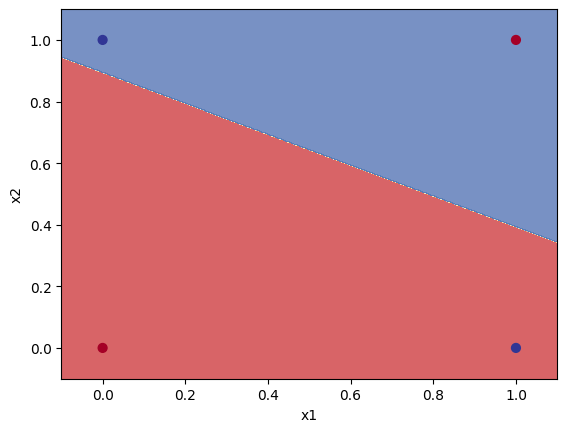

Epoch: 291/1000; Loss: 0.6931471824645996
Epoch: 292/1000; Loss: 0.6931471228599548
Epoch: 293/1000; Loss: 0.6931471824645996
Epoch: 294/1000; Loss: 0.6931471824645996
Epoch: 295/1000; Loss: 0.6931471824645996
Epoch: 296/1000; Loss: 0.6931471824645996
Epoch: 297/1000; Loss: 0.6931471824645996
Epoch: 298/1000; Loss: 0.6931471824645996
Epoch: 299/1000; Loss: 0.6931471824645996
Epoch: 300/1000; Loss: 0.6931471824645996


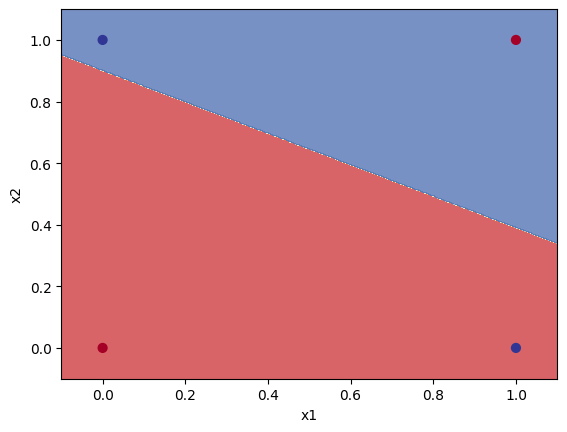

Epoch: 301/1000; Loss: 0.6931471824645996
Epoch: 302/1000; Loss: 0.6931471228599548
Epoch: 303/1000; Loss: 0.6931471824645996
Epoch: 304/1000; Loss: 0.6931471824645996
Epoch: 305/1000; Loss: 0.6931471824645996
Epoch: 306/1000; Loss: 0.6931471824645996
Epoch: 307/1000; Loss: 0.6931471824645996
Epoch: 308/1000; Loss: 0.6931471824645996
Epoch: 309/1000; Loss: 0.6931471824645996
Epoch: 310/1000; Loss: 0.6931471228599548


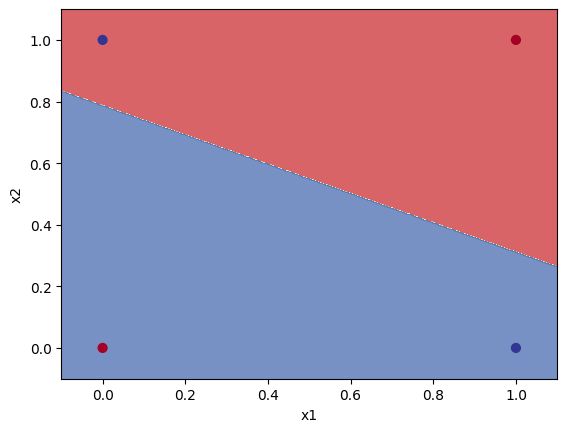

Epoch: 311/1000; Loss: 0.6931471824645996
Epoch: 312/1000; Loss: 0.6931471824645996
Epoch: 313/1000; Loss: 0.6931471824645996
Epoch: 314/1000; Loss: 0.6931471824645996
Epoch: 315/1000; Loss: 0.6931471824645996
Epoch: 316/1000; Loss: 0.6931471824645996
Epoch: 317/1000; Loss: 0.6931471824645996
Epoch: 318/1000; Loss: 0.6931471824645996
Epoch: 319/1000; Loss: 0.6931471824645996
Epoch: 320/1000; Loss: 0.6931471824645996


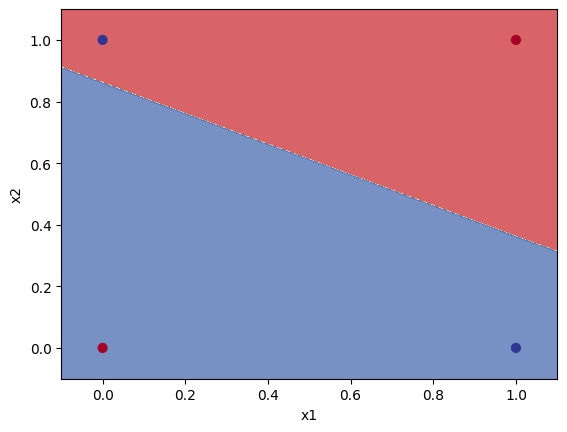

Epoch: 321/1000; Loss: 0.6931472420692444
Epoch: 322/1000; Loss: 0.6931471824645996
Epoch: 323/1000; Loss: 0.6931471824645996
Epoch: 324/1000; Loss: 0.6931471824645996
Epoch: 325/1000; Loss: 0.6931472420692444
Epoch: 326/1000; Loss: 0.6931472420692444
Epoch: 327/1000; Loss: 0.6931471824645996
Epoch: 328/1000; Loss: 0.6931471824645996
Epoch: 329/1000; Loss: 0.6931471824645996
Epoch: 330/1000; Loss: 0.6931472420692444


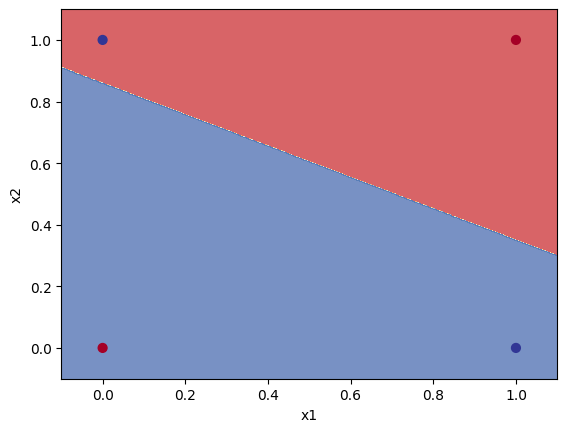

Epoch: 331/1000; Loss: 0.6931472420692444
Epoch: 332/1000; Loss: 0.6931472420692444
Epoch: 333/1000; Loss: 0.6931471824645996
Epoch: 334/1000; Loss: 0.6931471824645996
Epoch: 335/1000; Loss: 0.6931471824645996
Epoch: 336/1000; Loss: 0.6931471228599548
Epoch: 337/1000; Loss: 0.6931471824645996
Epoch: 338/1000; Loss: 0.6931471824645996
Epoch: 339/1000; Loss: 0.6931471824645996
Epoch: 340/1000; Loss: 0.6931471824645996


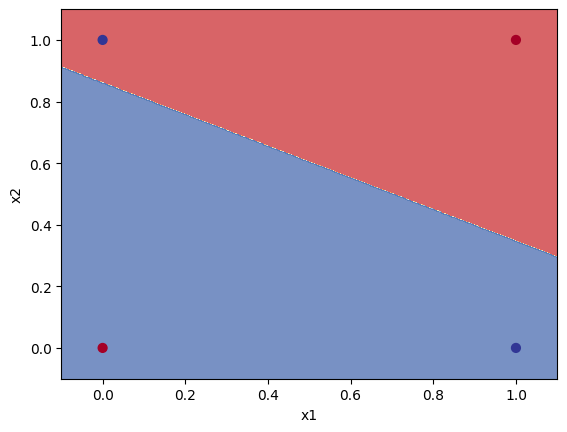

Epoch: 341/1000; Loss: 0.6931471824645996
Epoch: 342/1000; Loss: 0.6931471824645996
Epoch: 343/1000; Loss: 0.6931471824645996
Epoch: 344/1000; Loss: 0.6931471824645996
Epoch: 345/1000; Loss: 0.6931471824645996
Epoch: 346/1000; Loss: 0.6931472420692444
Epoch: 347/1000; Loss: 0.6931472420692444
Epoch: 348/1000; Loss: 0.6931471824645996
Epoch: 349/1000; Loss: 0.6931471824645996
Epoch: 350/1000; Loss: 0.6931471228599548


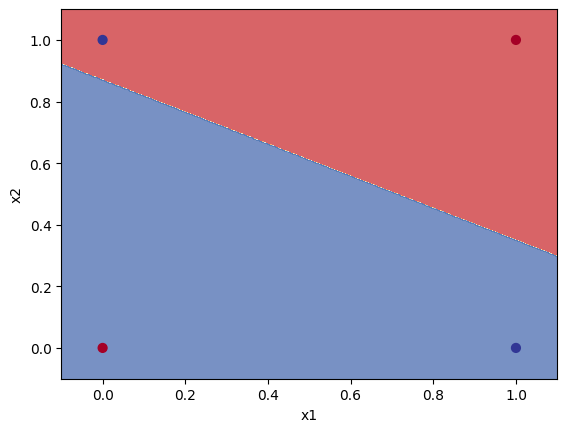

Epoch: 351/1000; Loss: 0.6931471228599548
Epoch: 352/1000; Loss: 0.6931471824645996
Epoch: 353/1000; Loss: 0.6931471824645996
Epoch: 354/1000; Loss: 0.6931471824645996
Epoch: 355/1000; Loss: 0.6931471824645996
Epoch: 356/1000; Loss: 0.6931471824645996
Epoch: 357/1000; Loss: 0.6931471824645996
Epoch: 358/1000; Loss: 0.6931471824645996
Epoch: 359/1000; Loss: 0.6931471824645996
Epoch: 360/1000; Loss: 0.6931471824645996


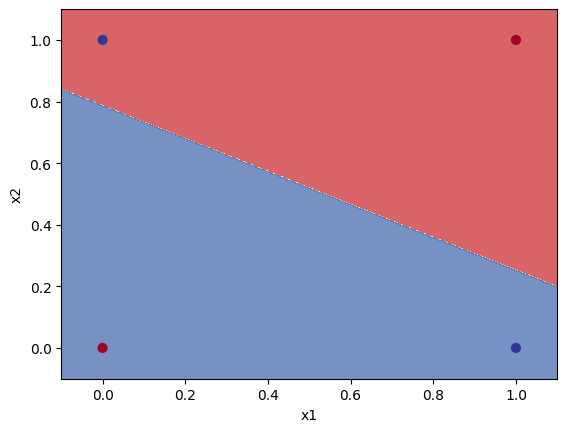

Epoch: 361/1000; Loss: 0.6931471824645996
Epoch: 362/1000; Loss: 0.6931471824645996
Epoch: 363/1000; Loss: 0.6931471228599548
Epoch: 364/1000; Loss: 0.6931471824645996
Epoch: 365/1000; Loss: 0.6931471824645996
Epoch: 366/1000; Loss: 0.6931471824645996
Epoch: 367/1000; Loss: 0.6931471824645996
Epoch: 368/1000; Loss: 0.6931471824645996
Epoch: 369/1000; Loss: 0.6931471824645996
Epoch: 370/1000; Loss: 0.6931471824645996


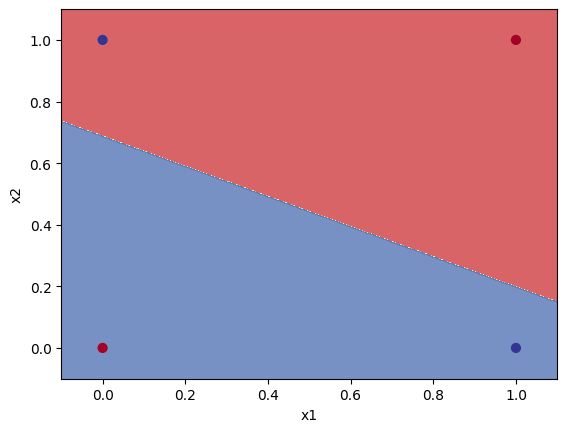

Epoch: 371/1000; Loss: 0.6931471228599548
Epoch: 372/1000; Loss: 0.6931471228599548
Epoch: 373/1000; Loss: 0.6931471228599548
Epoch: 374/1000; Loss: 0.6931471228599548
Epoch: 375/1000; Loss: 0.6931471228599548
Epoch: 376/1000; Loss: 0.6931471228599548
Epoch: 377/1000; Loss: 0.6931471824645996
Epoch: 378/1000; Loss: 0.6931471824645996
Epoch: 379/1000; Loss: 0.6931471824645996
Epoch: 380/1000; Loss: 0.6931471824645996


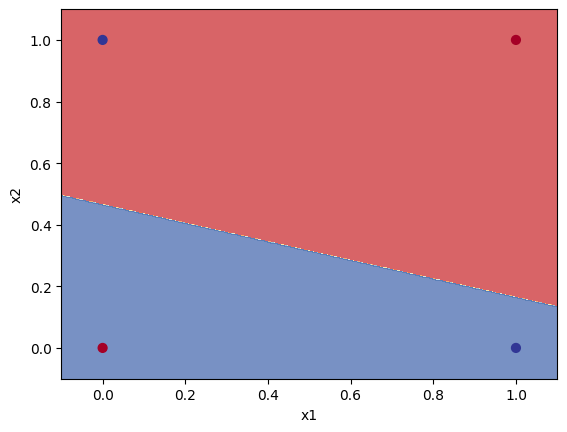

Epoch: 381/1000; Loss: 0.6931471824645996
Epoch: 382/1000; Loss: 0.6931471824645996
Epoch: 383/1000; Loss: 0.6931471824645996
Epoch: 384/1000; Loss: 0.6931471824645996
Epoch: 385/1000; Loss: 0.6931471824645996
Epoch: 386/1000; Loss: 0.6931471824645996
Epoch: 387/1000; Loss: 0.6931471824645996
Epoch: 388/1000; Loss: 0.6931471824645996
Epoch: 389/1000; Loss: 0.6931471824645996
Epoch: 390/1000; Loss: 0.6931471824645996


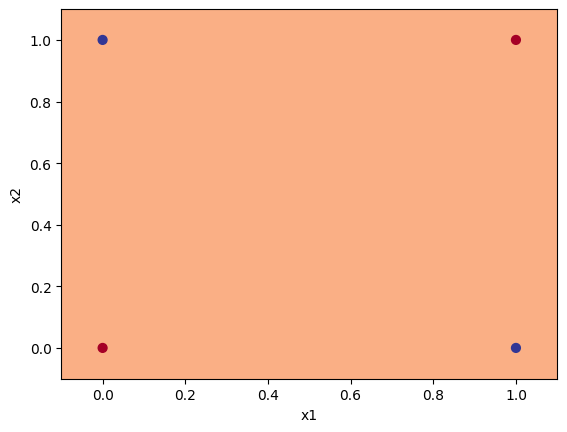

Epoch: 391/1000; Loss: 0.6931471824645996
Epoch: 392/1000; Loss: 0.6931471824645996
Epoch: 393/1000; Loss: 0.6931471824645996
Epoch: 394/1000; Loss: 0.6931471824645996
Epoch: 395/1000; Loss: 0.6931471824645996
Epoch: 396/1000; Loss: 0.6931471824645996
Epoch: 397/1000; Loss: 0.6931471824645996
Epoch: 398/1000; Loss: 0.6931471824645996
Epoch: 399/1000; Loss: 0.6931471824645996
Epoch: 400/1000; Loss: 0.6931471824645996


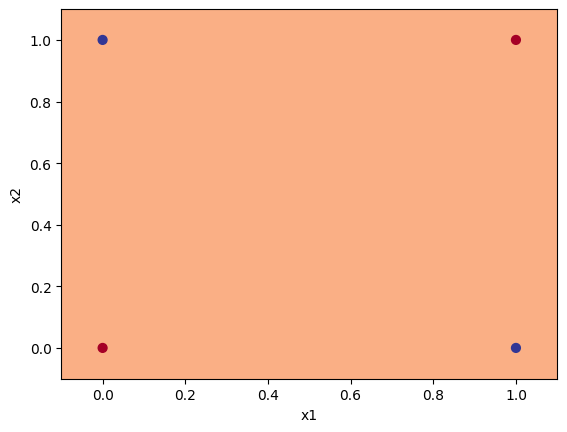

Epoch: 401/1000; Loss: 0.6931471824645996
Epoch: 402/1000; Loss: 0.6931471824645996
Epoch: 403/1000; Loss: 0.6931471824645996
Epoch: 404/1000; Loss: 0.6931471824645996
Epoch: 405/1000; Loss: 0.6931471824645996
Epoch: 406/1000; Loss: 0.6931471824645996
Epoch: 407/1000; Loss: 0.6931471824645996
Epoch: 408/1000; Loss: 0.6931471824645996
Epoch: 409/1000; Loss: 0.6931471824645996
Epoch: 410/1000; Loss: 0.6931471824645996


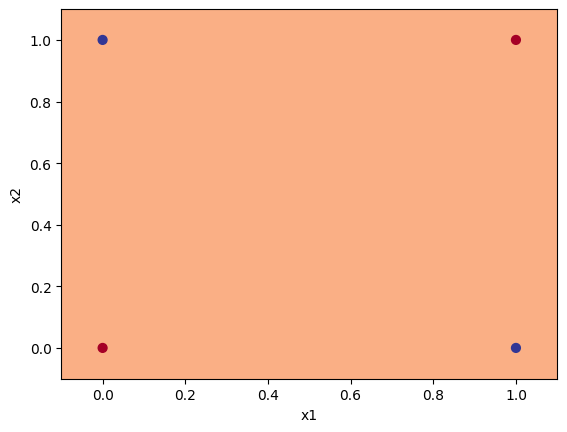

Epoch: 411/1000; Loss: 0.6931471824645996
Epoch: 412/1000; Loss: 0.6931471824645996
Epoch: 413/1000; Loss: 0.6931471824645996
Epoch: 414/1000; Loss: 0.6931471824645996
Epoch: 415/1000; Loss: 0.6931471824645996
Epoch: 416/1000; Loss: 0.6931471824645996
Epoch: 417/1000; Loss: 0.6931471824645996
Epoch: 418/1000; Loss: 0.6931471824645996
Epoch: 419/1000; Loss: 0.6931471824645996
Epoch: 420/1000; Loss: 0.6931471824645996


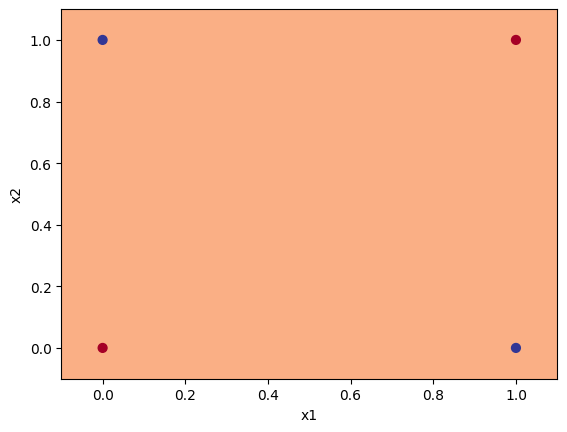

Epoch: 421/1000; Loss: 0.6931471824645996
Epoch: 422/1000; Loss: 0.6931471824645996
Epoch: 423/1000; Loss: 0.6931471824645996
Epoch: 424/1000; Loss: 0.6931471824645996
Epoch: 425/1000; Loss: 0.6931471824645996
Epoch: 426/1000; Loss: 0.6931471824645996
Epoch: 427/1000; Loss: 0.6931471824645996
Epoch: 428/1000; Loss: 0.6931471824645996
Epoch: 429/1000; Loss: 0.6931471824645996
Epoch: 430/1000; Loss: 0.6931471824645996


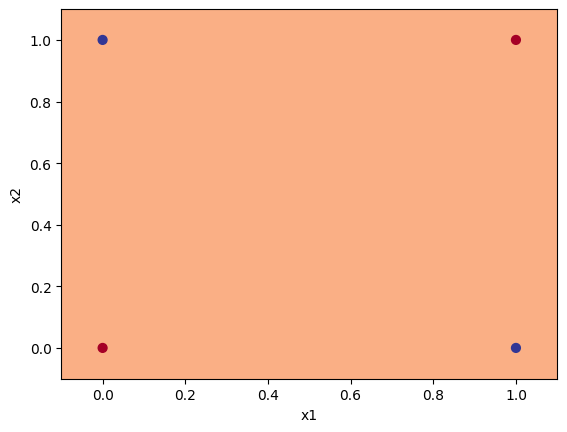

Epoch: 431/1000; Loss: 0.6931471824645996
Epoch: 432/1000; Loss: 0.6931471824645996
Epoch: 433/1000; Loss: 0.6931471824645996
Epoch: 434/1000; Loss: 0.6931471824645996
Epoch: 435/1000; Loss: 0.6931471824645996
Epoch: 436/1000; Loss: 0.6931471824645996
Epoch: 437/1000; Loss: 0.6931471824645996
Epoch: 438/1000; Loss: 0.6931471824645996
Epoch: 439/1000; Loss: 0.6931471824645996
Epoch: 440/1000; Loss: 0.6931471824645996


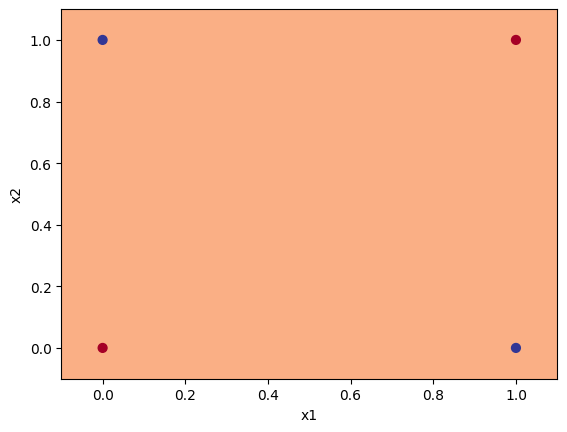

Epoch: 441/1000; Loss: 0.6931471824645996
Epoch: 442/1000; Loss: 0.6931471824645996
Epoch: 443/1000; Loss: 0.6931471824645996
Epoch: 444/1000; Loss: 0.6931471824645996
Epoch: 445/1000; Loss: 0.6931471824645996
Epoch: 446/1000; Loss: 0.6931471824645996
Epoch: 447/1000; Loss: 0.6931471824645996
Epoch: 448/1000; Loss: 0.6931471824645996
Epoch: 449/1000; Loss: 0.6931471824645996
Epoch: 450/1000; Loss: 0.6931471824645996


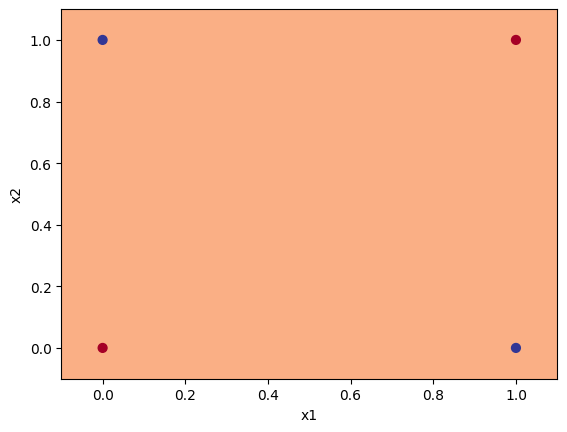

Epoch: 451/1000; Loss: 0.6931471824645996
Epoch: 452/1000; Loss: 0.6931471824645996
Epoch: 453/1000; Loss: 0.6931471824645996
Epoch: 454/1000; Loss: 0.6931471824645996
Epoch: 455/1000; Loss: 0.6931471824645996
Epoch: 456/1000; Loss: 0.6931471824645996
Epoch: 457/1000; Loss: 0.6931471824645996
Epoch: 458/1000; Loss: 0.6931471824645996
Epoch: 459/1000; Loss: 0.6931471824645996
Epoch: 460/1000; Loss: 0.6931471824645996


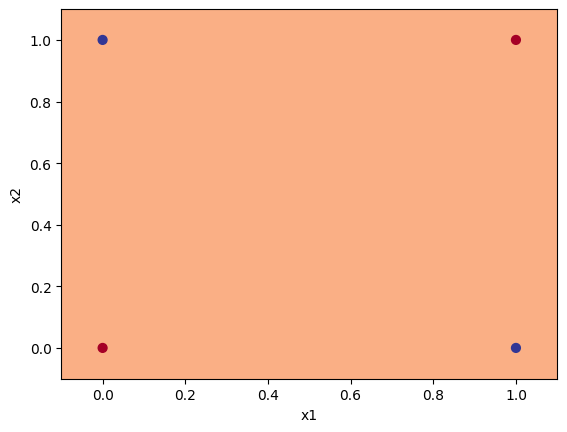

Epoch: 461/1000; Loss: 0.6931471824645996
Epoch: 462/1000; Loss: 0.6931471824645996
Epoch: 463/1000; Loss: 0.6931471824645996
Epoch: 464/1000; Loss: 0.6931471824645996
Epoch: 465/1000; Loss: 0.6931471824645996
Epoch: 466/1000; Loss: 0.6931471824645996
Epoch: 467/1000; Loss: 0.6931471824645996
Epoch: 468/1000; Loss: 0.6931471824645996
Epoch: 469/1000; Loss: 0.6931471824645996
Epoch: 470/1000; Loss: 0.6931471824645996


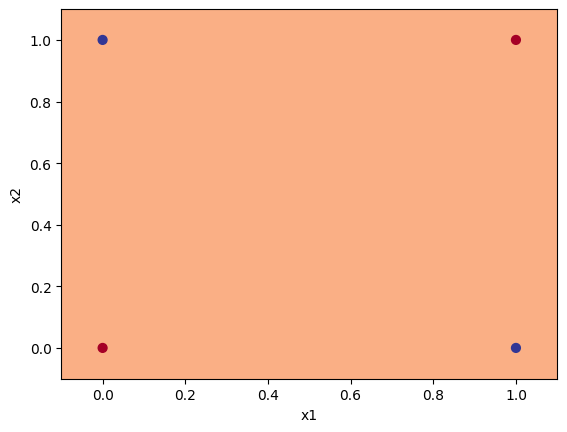

Epoch: 471/1000; Loss: 0.6931471824645996
Epoch: 472/1000; Loss: 0.6931471824645996
Epoch: 473/1000; Loss: 0.6931471824645996
Epoch: 474/1000; Loss: 0.6931471824645996
Epoch: 475/1000; Loss: 0.6931471824645996
Epoch: 476/1000; Loss: 0.6931471824645996
Epoch: 477/1000; Loss: 0.6931471824645996
Epoch: 478/1000; Loss: 0.6931471824645996
Epoch: 479/1000; Loss: 0.6931471824645996
Epoch: 480/1000; Loss: 0.6931471824645996


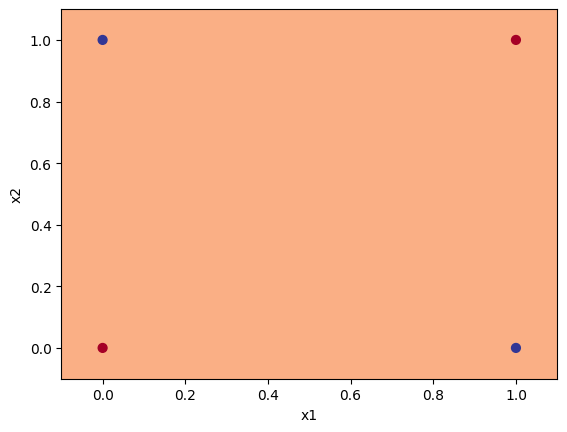

Epoch: 481/1000; Loss: 0.6931471824645996
Epoch: 482/1000; Loss: 0.6931471824645996
Epoch: 483/1000; Loss: 0.6931471824645996
Epoch: 484/1000; Loss: 0.6931471824645996
Epoch: 485/1000; Loss: 0.6931471824645996
Epoch: 486/1000; Loss: 0.6931471824645996
Epoch: 487/1000; Loss: 0.6931471824645996
Epoch: 488/1000; Loss: 0.6931471824645996
Epoch: 489/1000; Loss: 0.6931471824645996
Epoch: 490/1000; Loss: 0.6931471824645996


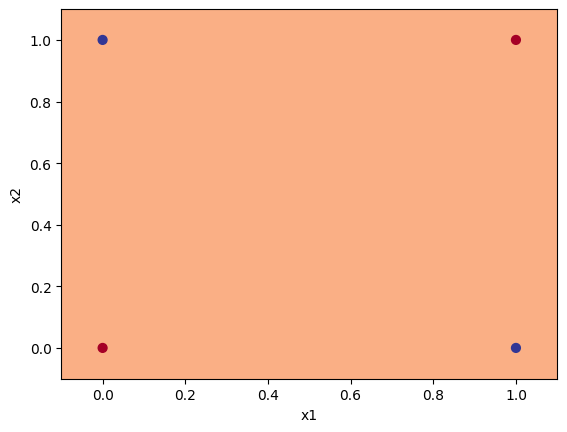

Epoch: 491/1000; Loss: 0.6931471824645996
Epoch: 492/1000; Loss: 0.6931471824645996
Epoch: 493/1000; Loss: 0.6931471824645996
Epoch: 494/1000; Loss: 0.6931471824645996
Epoch: 495/1000; Loss: 0.6931471824645996
Epoch: 496/1000; Loss: 0.6931471824645996
Epoch: 497/1000; Loss: 0.6931471824645996
Epoch: 498/1000; Loss: 0.6931471824645996
Epoch: 499/1000; Loss: 0.6931471824645996
Epoch: 500/1000; Loss: 0.6931471824645996


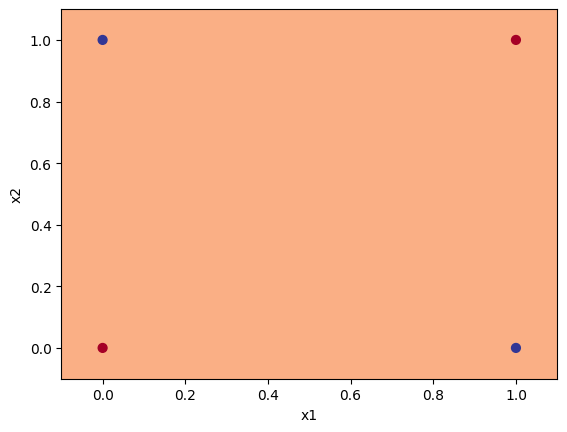

Epoch: 501/1000; Loss: 0.6931471824645996
Epoch: 502/1000; Loss: 0.6931471824645996
Epoch: 503/1000; Loss: 0.6931471824645996
Epoch: 504/1000; Loss: 0.6931471824645996
Epoch: 505/1000; Loss: 0.6931471824645996
Epoch: 506/1000; Loss: 0.6931471824645996
Epoch: 507/1000; Loss: 0.6931471824645996
Epoch: 508/1000; Loss: 0.6931471824645996
Epoch: 509/1000; Loss: 0.6931471824645996
Epoch: 510/1000; Loss: 0.6931471824645996


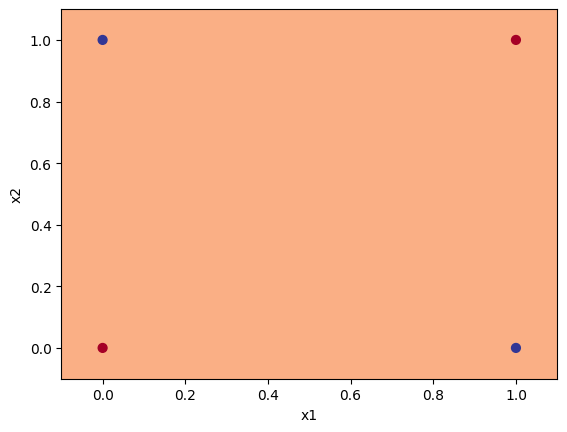

Epoch: 511/1000; Loss: 0.6931471824645996
Epoch: 512/1000; Loss: 0.6931471824645996
Epoch: 513/1000; Loss: 0.6931471824645996
Epoch: 514/1000; Loss: 0.6931471824645996
Epoch: 515/1000; Loss: 0.6931471824645996
Epoch: 516/1000; Loss: 0.6931471824645996
Epoch: 517/1000; Loss: 0.6931471824645996
Epoch: 518/1000; Loss: 0.6931471824645996
Epoch: 519/1000; Loss: 0.6931471824645996
Epoch: 520/1000; Loss: 0.6931471824645996


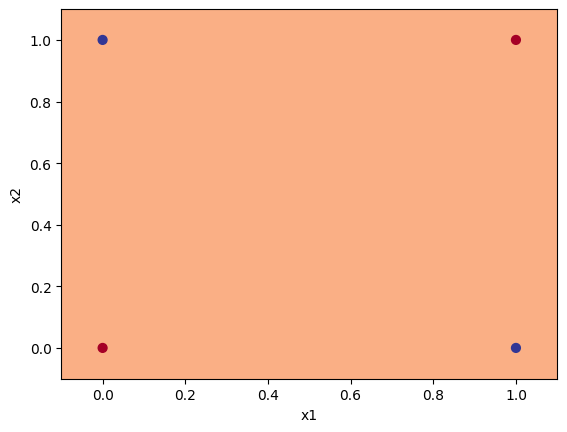

Epoch: 521/1000; Loss: 0.6931471824645996
Epoch: 522/1000; Loss: 0.6931471824645996
Epoch: 523/1000; Loss: 0.6931471824645996
Epoch: 524/1000; Loss: 0.6931471824645996
Epoch: 525/1000; Loss: 0.6931471824645996
Epoch: 526/1000; Loss: 0.6931471824645996
Epoch: 527/1000; Loss: 0.6931471824645996
Epoch: 528/1000; Loss: 0.6931471824645996
Epoch: 529/1000; Loss: 0.6931471824645996
Epoch: 530/1000; Loss: 0.6931471824645996


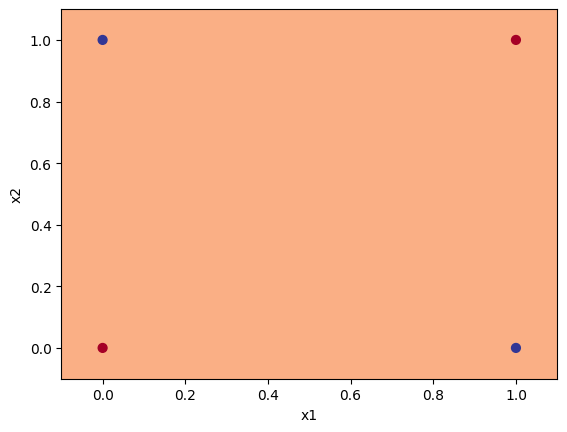

Epoch: 531/1000; Loss: 0.6931471824645996
Epoch: 532/1000; Loss: 0.6931471824645996
Epoch: 533/1000; Loss: 0.6931471824645996
Epoch: 534/1000; Loss: 0.6931471824645996
Epoch: 535/1000; Loss: 0.6931471824645996
Epoch: 536/1000; Loss: 0.6931471824645996
Epoch: 537/1000; Loss: 0.6931471824645996
Epoch: 538/1000; Loss: 0.6931471824645996
Epoch: 539/1000; Loss: 0.6931471824645996
Epoch: 540/1000; Loss: 0.6931471824645996


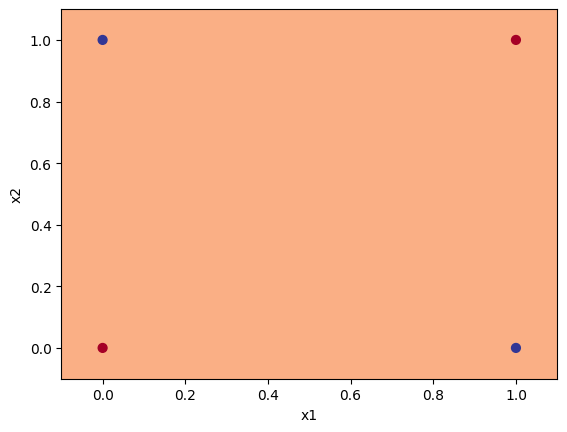

Epoch: 541/1000; Loss: 0.6931471824645996
Epoch: 542/1000; Loss: 0.6931471824645996
Epoch: 543/1000; Loss: 0.6931471824645996
Epoch: 544/1000; Loss: 0.6931471824645996
Epoch: 545/1000; Loss: 0.6931471824645996
Epoch: 546/1000; Loss: 0.6931471824645996
Epoch: 547/1000; Loss: 0.6931471824645996
Epoch: 548/1000; Loss: 0.6931471824645996
Epoch: 549/1000; Loss: 0.6931471824645996
Epoch: 550/1000; Loss: 0.6931471824645996


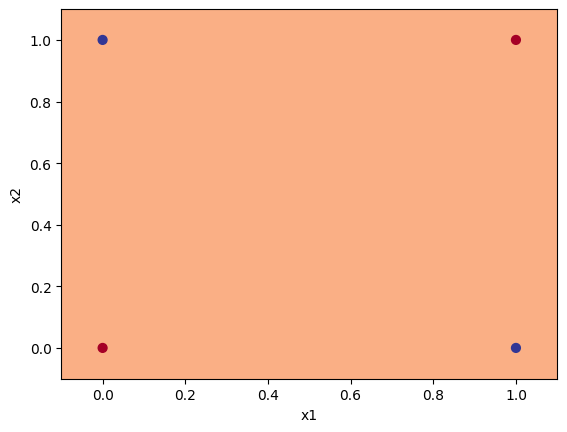

Epoch: 551/1000; Loss: 0.6931471824645996
Epoch: 552/1000; Loss: 0.6931471824645996
Epoch: 553/1000; Loss: 0.6931471824645996
Epoch: 554/1000; Loss: 0.6931471824645996
Epoch: 555/1000; Loss: 0.6931471824645996
Epoch: 556/1000; Loss: 0.6931471824645996
Epoch: 557/1000; Loss: 0.6931471824645996
Epoch: 558/1000; Loss: 0.6931471824645996
Epoch: 559/1000; Loss: 0.6931471824645996
Epoch: 560/1000; Loss: 0.6931471824645996


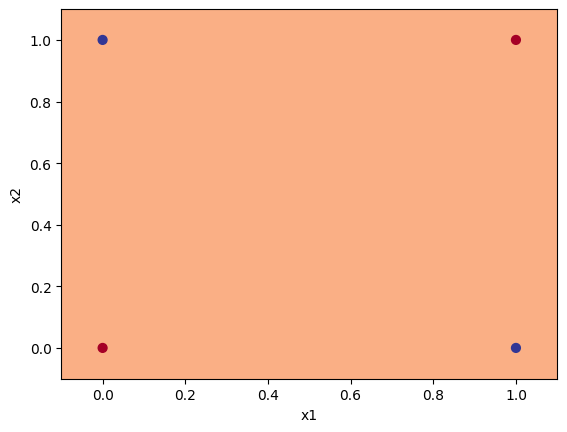

Epoch: 561/1000; Loss: 0.6931471824645996
Epoch: 562/1000; Loss: 0.6931471824645996
Epoch: 563/1000; Loss: 0.6931471824645996
Epoch: 564/1000; Loss: 0.6931471824645996
Epoch: 565/1000; Loss: 0.6931471824645996
Epoch: 566/1000; Loss: 0.6931471824645996
Epoch: 567/1000; Loss: 0.6931471824645996
Epoch: 568/1000; Loss: 0.6931471824645996
Epoch: 569/1000; Loss: 0.6931471824645996
Epoch: 570/1000; Loss: 0.6931471824645996


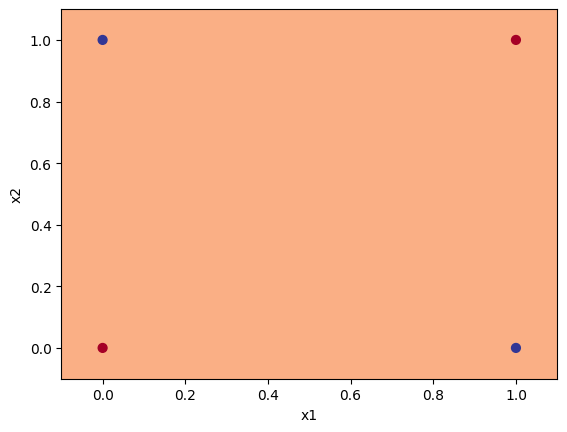

Epoch: 571/1000; Loss: 0.6931471824645996
Epoch: 572/1000; Loss: 0.6931471824645996
Epoch: 573/1000; Loss: 0.6931471824645996
Epoch: 574/1000; Loss: 0.6931471824645996
Epoch: 575/1000; Loss: 0.6931471824645996
Epoch: 576/1000; Loss: 0.6931471824645996
Epoch: 577/1000; Loss: 0.6931471824645996
Epoch: 578/1000; Loss: 0.6931471824645996
Epoch: 579/1000; Loss: 0.6931471824645996
Epoch: 580/1000; Loss: 0.6931471824645996


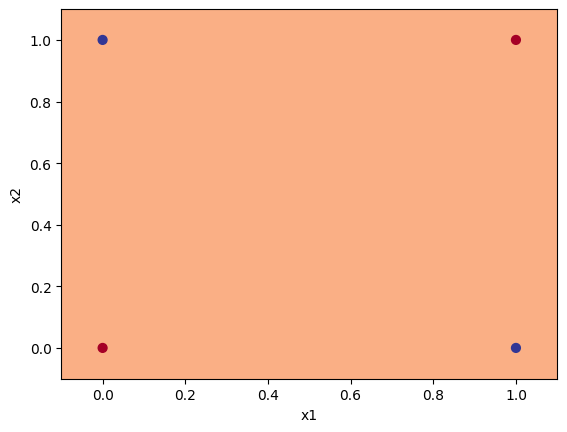

Epoch: 581/1000; Loss: 0.6931471824645996
Epoch: 582/1000; Loss: 0.6931471824645996
Epoch: 583/1000; Loss: 0.6931471824645996
Epoch: 584/1000; Loss: 0.6931471824645996
Epoch: 585/1000; Loss: 0.6931471824645996
Epoch: 586/1000; Loss: 0.6931471824645996
Epoch: 587/1000; Loss: 0.6931471824645996
Epoch: 588/1000; Loss: 0.6931471824645996
Epoch: 589/1000; Loss: 0.6931471824645996
Epoch: 590/1000; Loss: 0.6931471824645996


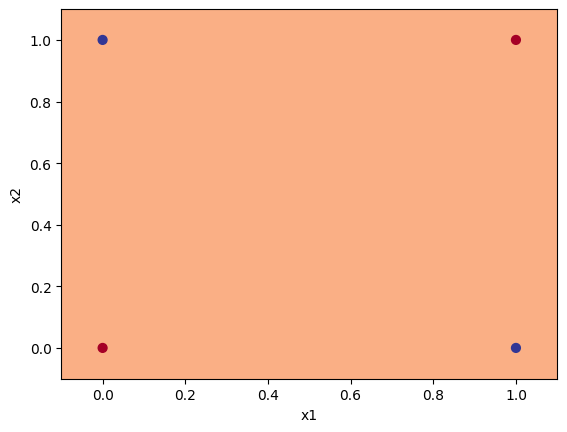

Epoch: 591/1000; Loss: 0.6931471824645996
Epoch: 592/1000; Loss: 0.6931471824645996
Epoch: 593/1000; Loss: 0.6931471824645996
Epoch: 594/1000; Loss: 0.6931471824645996
Epoch: 595/1000; Loss: 0.6931471824645996
Epoch: 596/1000; Loss: 0.6931471824645996
Epoch: 597/1000; Loss: 0.6931471824645996
Epoch: 598/1000; Loss: 0.6931471824645996
Epoch: 599/1000; Loss: 0.6931471824645996
Epoch: 600/1000; Loss: 0.6931471824645996


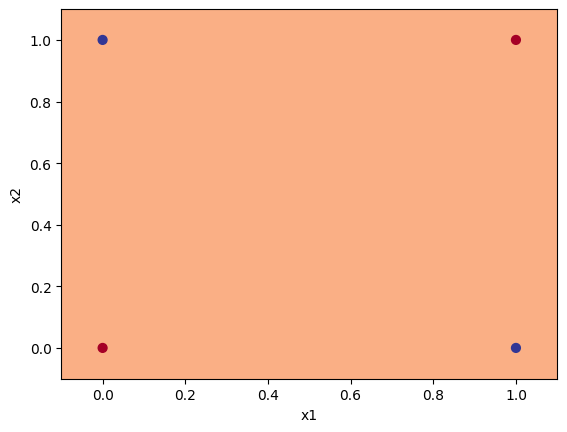

Epoch: 601/1000; Loss: 0.6931471824645996
Epoch: 602/1000; Loss: 0.6931471824645996
Epoch: 603/1000; Loss: 0.6931471824645996
Epoch: 604/1000; Loss: 0.6931471824645996
Epoch: 605/1000; Loss: 0.6931471824645996
Epoch: 606/1000; Loss: 0.6931471824645996
Epoch: 607/1000; Loss: 0.6931471824645996
Epoch: 608/1000; Loss: 0.6931471824645996
Epoch: 609/1000; Loss: 0.6931471824645996
Epoch: 610/1000; Loss: 0.6931471824645996


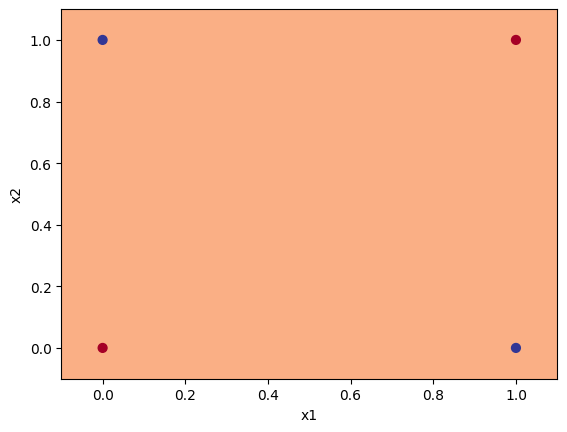

Epoch: 611/1000; Loss: 0.6931471824645996
Epoch: 612/1000; Loss: 0.6931471824645996
Epoch: 613/1000; Loss: 0.6931471824645996
Epoch: 614/1000; Loss: 0.6931471824645996
Epoch: 615/1000; Loss: 0.6931471824645996
Epoch: 616/1000; Loss: 0.6931471824645996
Epoch: 617/1000; Loss: 0.6931471824645996
Epoch: 618/1000; Loss: 0.6931471824645996
Epoch: 619/1000; Loss: 0.6931471824645996
Epoch: 620/1000; Loss: 0.6931471824645996


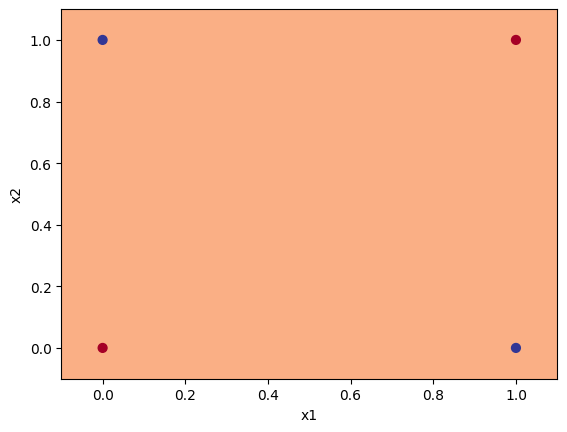

Epoch: 621/1000; Loss: 0.6931471824645996
Epoch: 622/1000; Loss: 0.6931471824645996
Epoch: 623/1000; Loss: 0.6931471824645996
Epoch: 624/1000; Loss: 0.6931471824645996
Epoch: 625/1000; Loss: 0.6931471824645996
Epoch: 626/1000; Loss: 0.6931471824645996
Epoch: 627/1000; Loss: 0.6931471824645996
Epoch: 628/1000; Loss: 0.6931471824645996
Epoch: 629/1000; Loss: 0.6931471824645996
Epoch: 630/1000; Loss: 0.6931471824645996


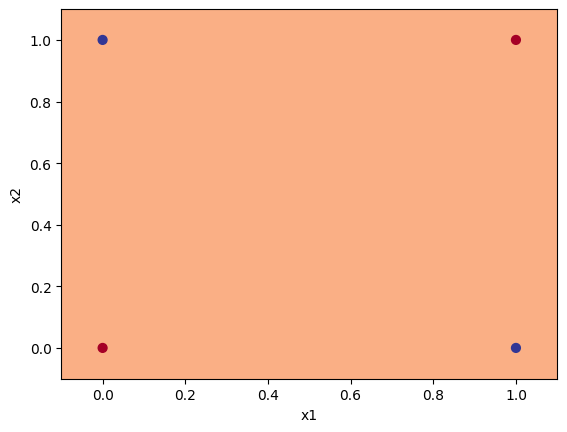

Epoch: 631/1000; Loss: 0.6931471824645996
Epoch: 632/1000; Loss: 0.6931471824645996
Epoch: 633/1000; Loss: 0.6931471824645996
Epoch: 634/1000; Loss: 0.6931471824645996
Epoch: 635/1000; Loss: 0.6931471824645996
Epoch: 636/1000; Loss: 0.6931471824645996
Epoch: 637/1000; Loss: 0.6931471824645996
Epoch: 638/1000; Loss: 0.6931471824645996
Epoch: 639/1000; Loss: 0.6931471824645996
Epoch: 640/1000; Loss: 0.6931471824645996


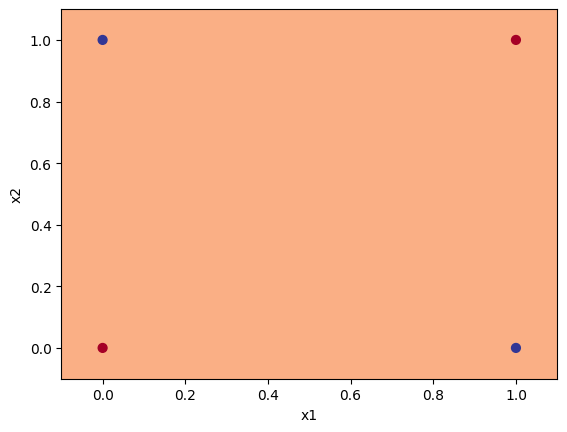

Epoch: 641/1000; Loss: 0.6931471824645996
Epoch: 642/1000; Loss: 0.6931471824645996
Epoch: 643/1000; Loss: 0.6931471824645996
Epoch: 644/1000; Loss: 0.6931471824645996
Epoch: 645/1000; Loss: 0.6931471824645996
Epoch: 646/1000; Loss: 0.6931471824645996
Epoch: 647/1000; Loss: 0.6931471824645996
Epoch: 648/1000; Loss: 0.6931471824645996
Epoch: 649/1000; Loss: 0.6931471824645996
Epoch: 650/1000; Loss: 0.6931471824645996


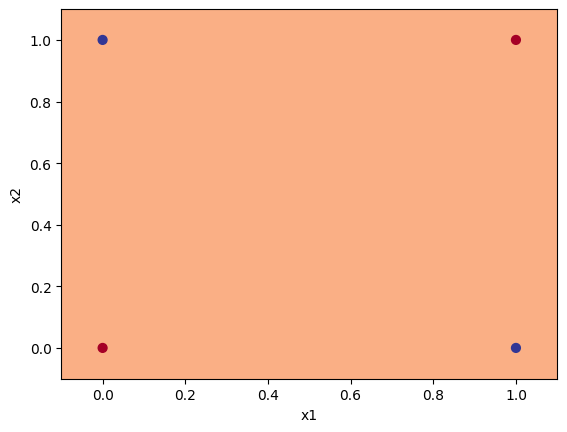

Epoch: 651/1000; Loss: 0.6931471824645996
Epoch: 652/1000; Loss: 0.6931471824645996
Epoch: 653/1000; Loss: 0.6931471824645996
Epoch: 654/1000; Loss: 0.6931471824645996
Epoch: 655/1000; Loss: 0.6931471824645996
Epoch: 656/1000; Loss: 0.6931471824645996
Epoch: 657/1000; Loss: 0.6931471824645996
Epoch: 658/1000; Loss: 0.6931471824645996
Epoch: 659/1000; Loss: 0.6931471824645996
Epoch: 660/1000; Loss: 0.6931471824645996


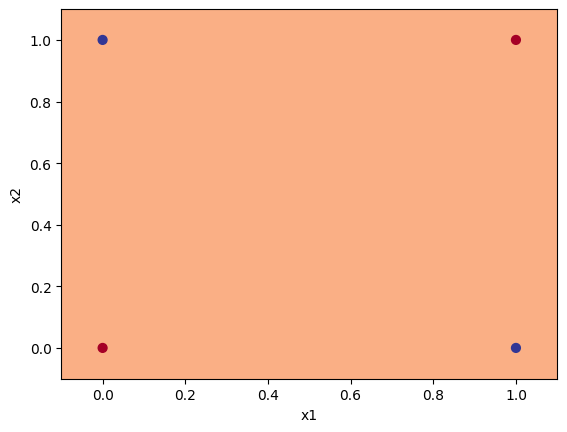

Epoch: 661/1000; Loss: 0.6931471824645996
Epoch: 662/1000; Loss: 0.6931471824645996
Epoch: 663/1000; Loss: 0.6931471824645996
Epoch: 664/1000; Loss: 0.6931471824645996
Epoch: 665/1000; Loss: 0.6931471824645996
Epoch: 666/1000; Loss: 0.6931471824645996
Epoch: 667/1000; Loss: 0.6931471824645996
Epoch: 668/1000; Loss: 0.6931471824645996
Epoch: 669/1000; Loss: 0.6931471824645996
Epoch: 670/1000; Loss: 0.6931471824645996


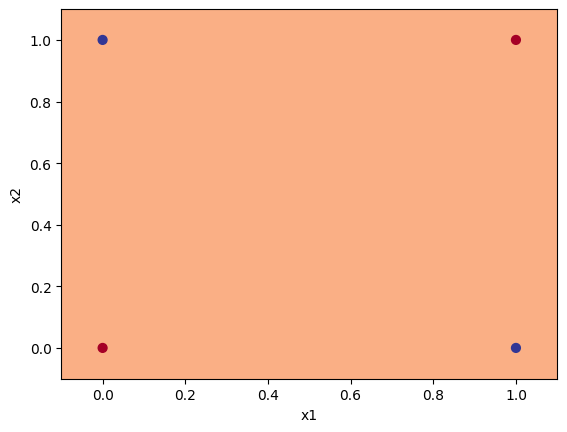

Epoch: 671/1000; Loss: 0.6931471824645996
Epoch: 672/1000; Loss: 0.6931471824645996
Epoch: 673/1000; Loss: 0.6931471824645996
Epoch: 674/1000; Loss: 0.6931471824645996
Epoch: 675/1000; Loss: 0.6931471824645996
Epoch: 676/1000; Loss: 0.6931471824645996
Epoch: 677/1000; Loss: 0.6931471824645996
Epoch: 678/1000; Loss: 0.6931471824645996
Epoch: 679/1000; Loss: 0.6931471824645996
Epoch: 680/1000; Loss: 0.6931471824645996


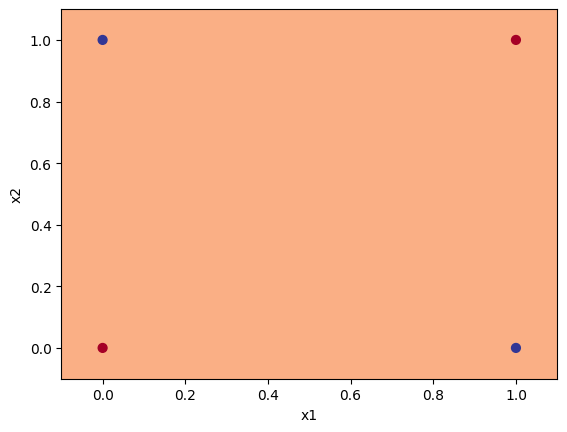

Epoch: 681/1000; Loss: 0.6931471824645996
Epoch: 682/1000; Loss: 0.6931471824645996
Epoch: 683/1000; Loss: 0.6931471824645996
Epoch: 684/1000; Loss: 0.6931471824645996
Epoch: 685/1000; Loss: 0.6931471824645996
Epoch: 686/1000; Loss: 0.6931471824645996
Epoch: 687/1000; Loss: 0.6931471824645996
Epoch: 688/1000; Loss: 0.6931471824645996
Epoch: 689/1000; Loss: 0.6931471824645996
Epoch: 690/1000; Loss: 0.6931471824645996


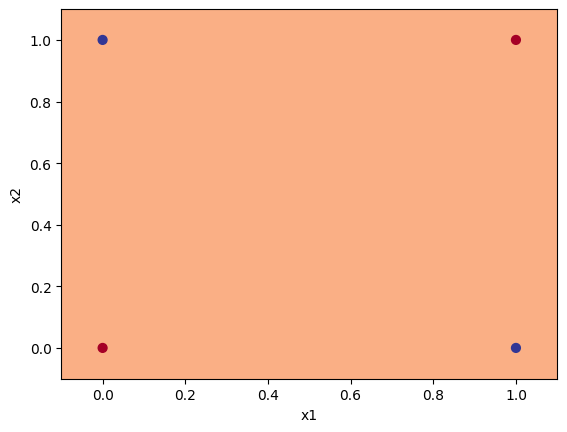

Epoch: 691/1000; Loss: 0.6931471824645996
Epoch: 692/1000; Loss: 0.6931471824645996
Epoch: 693/1000; Loss: 0.6931471824645996
Epoch: 694/1000; Loss: 0.6931471824645996
Epoch: 695/1000; Loss: 0.6931471824645996
Epoch: 696/1000; Loss: 0.6931471824645996
Epoch: 697/1000; Loss: 0.6931471824645996
Epoch: 698/1000; Loss: 0.6931471824645996
Epoch: 699/1000; Loss: 0.6931471824645996
Epoch: 700/1000; Loss: 0.6931471824645996


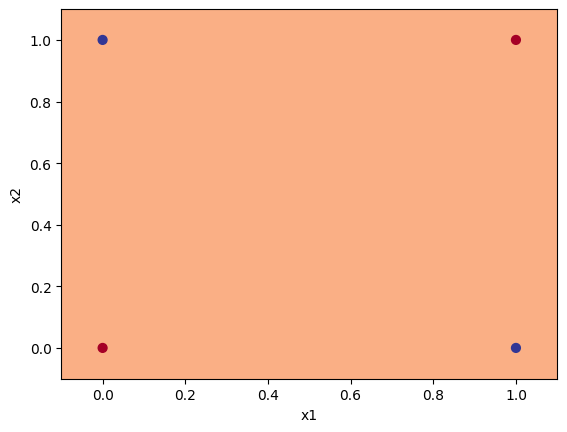

Epoch: 701/1000; Loss: 0.6931471824645996
Epoch: 702/1000; Loss: 0.6931471824645996
Epoch: 703/1000; Loss: 0.6931471824645996
Epoch: 704/1000; Loss: 0.6931471824645996
Epoch: 705/1000; Loss: 0.6931471824645996
Epoch: 706/1000; Loss: 0.6931471824645996
Epoch: 707/1000; Loss: 0.6931471824645996
Epoch: 708/1000; Loss: 0.6931471824645996
Epoch: 709/1000; Loss: 0.6931471824645996
Epoch: 710/1000; Loss: 0.6931471824645996


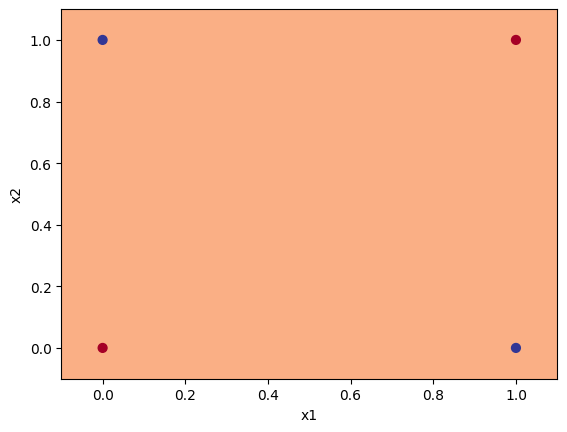

Epoch: 711/1000; Loss: 0.6931471824645996
Epoch: 712/1000; Loss: 0.6931471824645996
Epoch: 713/1000; Loss: 0.6931471824645996
Epoch: 714/1000; Loss: 0.6931471824645996
Epoch: 715/1000; Loss: 0.6931471824645996
Epoch: 716/1000; Loss: 0.6931471824645996
Epoch: 717/1000; Loss: 0.6931471824645996
Epoch: 718/1000; Loss: 0.6931471824645996
Epoch: 719/1000; Loss: 0.6931471824645996
Epoch: 720/1000; Loss: 0.6931471824645996


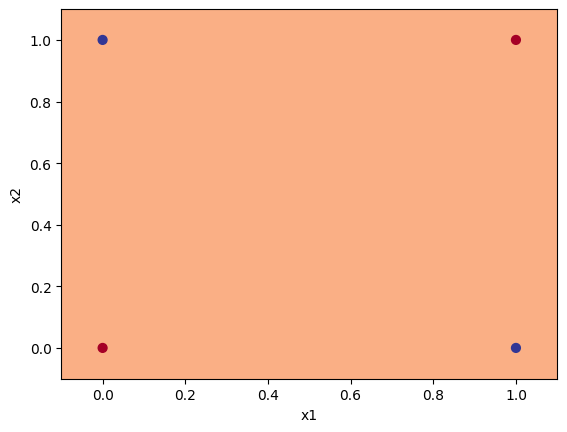

Epoch: 721/1000; Loss: 0.6931471824645996
Epoch: 722/1000; Loss: 0.6931471824645996
Epoch: 723/1000; Loss: 0.6931471824645996
Epoch: 724/1000; Loss: 0.6931471824645996
Epoch: 725/1000; Loss: 0.6931471824645996
Epoch: 726/1000; Loss: 0.6931471824645996
Epoch: 727/1000; Loss: 0.6931471824645996
Epoch: 728/1000; Loss: 0.6931471824645996
Epoch: 729/1000; Loss: 0.6931471824645996
Epoch: 730/1000; Loss: 0.6931471824645996


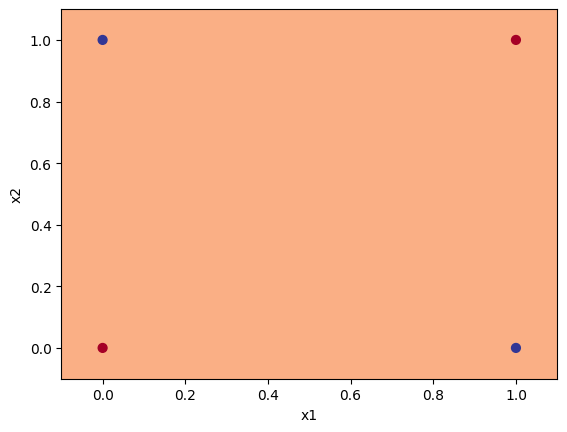

Epoch: 731/1000; Loss: 0.6931471824645996
Epoch: 732/1000; Loss: 0.6931471824645996
Epoch: 733/1000; Loss: 0.6931471824645996
Epoch: 734/1000; Loss: 0.6931471824645996
Epoch: 735/1000; Loss: 0.6931471824645996
Epoch: 736/1000; Loss: 0.6931471824645996
Epoch: 737/1000; Loss: 0.6931471824645996
Epoch: 738/1000; Loss: 0.6931471824645996
Epoch: 739/1000; Loss: 0.6931471824645996
Epoch: 740/1000; Loss: 0.6931471824645996


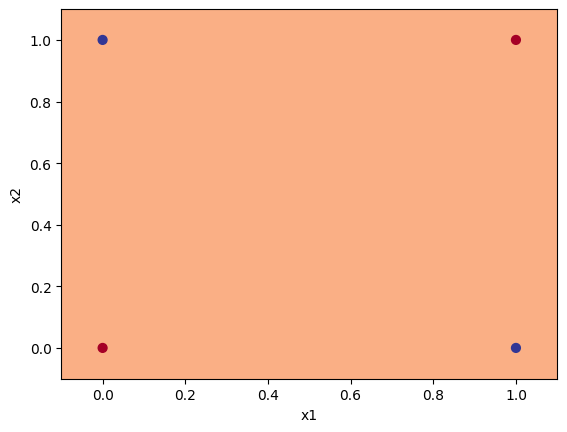

Epoch: 741/1000; Loss: 0.6931471824645996
Epoch: 742/1000; Loss: 0.6931471824645996
Epoch: 743/1000; Loss: 0.6931471824645996
Epoch: 744/1000; Loss: 0.6931471824645996
Epoch: 745/1000; Loss: 0.6931471824645996
Epoch: 746/1000; Loss: 0.6931471824645996
Epoch: 747/1000; Loss: 0.6931471824645996
Epoch: 748/1000; Loss: 0.6931471824645996
Epoch: 749/1000; Loss: 0.6931471824645996
Epoch: 750/1000; Loss: 0.6931471824645996


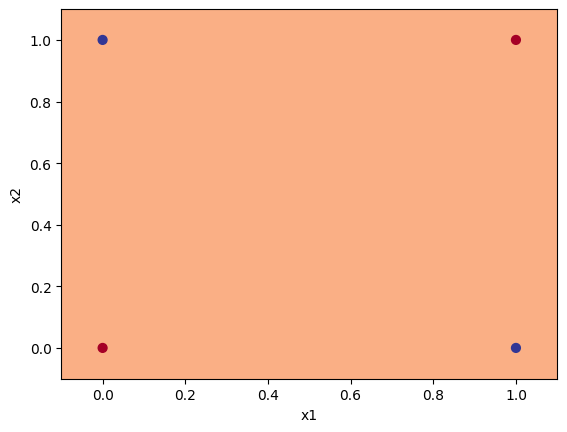

Epoch: 751/1000; Loss: 0.6931471824645996
Epoch: 752/1000; Loss: 0.6931471824645996
Epoch: 753/1000; Loss: 0.6931471824645996
Epoch: 754/1000; Loss: 0.6931471824645996
Epoch: 755/1000; Loss: 0.6931471824645996
Epoch: 756/1000; Loss: 0.6931471824645996
Epoch: 757/1000; Loss: 0.6931471824645996
Epoch: 758/1000; Loss: 0.6931471824645996
Epoch: 759/1000; Loss: 0.6931471824645996
Epoch: 760/1000; Loss: 0.6931471824645996


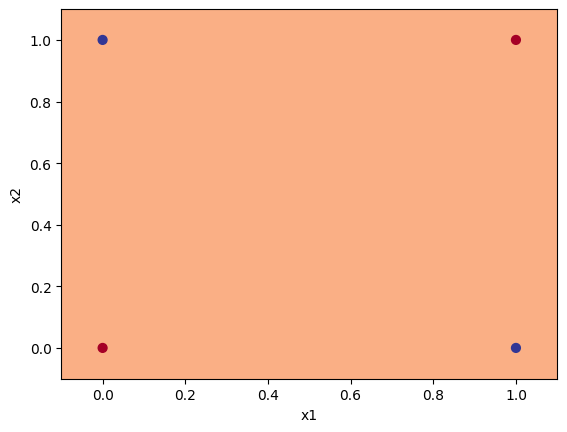

Epoch: 761/1000; Loss: 0.6931471824645996
Epoch: 762/1000; Loss: 0.6931471824645996
Epoch: 763/1000; Loss: 0.6931471824645996
Epoch: 764/1000; Loss: 0.6931471824645996
Epoch: 765/1000; Loss: 0.6931471824645996
Epoch: 766/1000; Loss: 0.6931471824645996
Epoch: 767/1000; Loss: 0.6931471824645996
Epoch: 768/1000; Loss: 0.6931471824645996
Epoch: 769/1000; Loss: 0.6931471824645996
Epoch: 770/1000; Loss: 0.6931471824645996


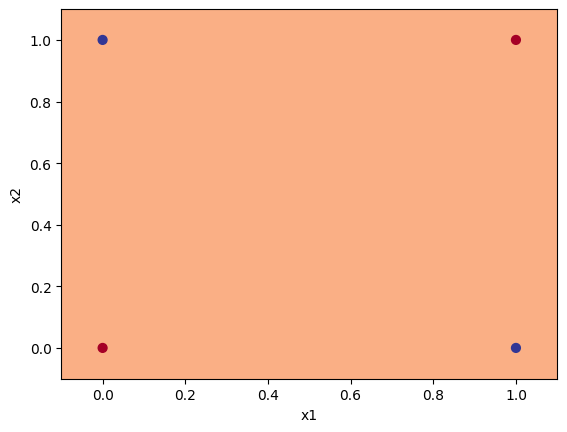

Epoch: 771/1000; Loss: 0.6931471824645996
Epoch: 772/1000; Loss: 0.6931471824645996
Epoch: 773/1000; Loss: 0.6931471824645996
Epoch: 774/1000; Loss: 0.6931471824645996
Epoch: 775/1000; Loss: 0.6931471824645996
Epoch: 776/1000; Loss: 0.6931471824645996
Epoch: 777/1000; Loss: 0.6931471824645996
Epoch: 778/1000; Loss: 0.6931471824645996
Epoch: 779/1000; Loss: 0.6931471824645996
Epoch: 780/1000; Loss: 0.6931471824645996


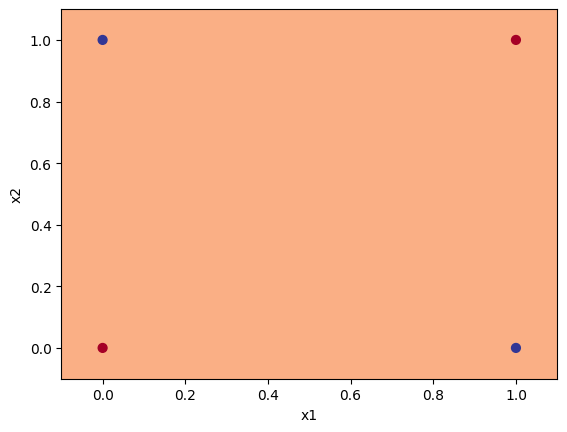

Epoch: 781/1000; Loss: 0.6931471824645996
Epoch: 782/1000; Loss: 0.6931471824645996
Epoch: 783/1000; Loss: 0.6931471824645996
Epoch: 784/1000; Loss: 0.6931471824645996
Epoch: 785/1000; Loss: 0.6931471824645996
Epoch: 786/1000; Loss: 0.6931471824645996
Epoch: 787/1000; Loss: 0.6931471824645996
Epoch: 788/1000; Loss: 0.6931471824645996
Epoch: 789/1000; Loss: 0.6931471824645996
Epoch: 790/1000; Loss: 0.6931471824645996


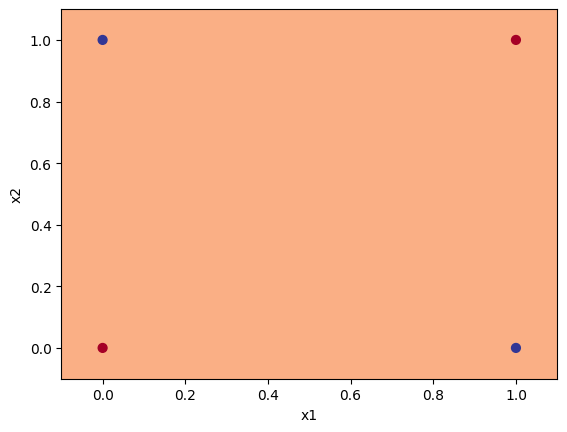

Epoch: 791/1000; Loss: 0.6931471824645996
Epoch: 792/1000; Loss: 0.6931471824645996
Epoch: 793/1000; Loss: 0.6931471824645996
Epoch: 794/1000; Loss: 0.6931471824645996
Epoch: 795/1000; Loss: 0.6931471824645996
Epoch: 796/1000; Loss: 0.6931471824645996
Epoch: 797/1000; Loss: 0.6931471824645996
Epoch: 798/1000; Loss: 0.6931471824645996
Epoch: 799/1000; Loss: 0.6931471824645996
Epoch: 800/1000; Loss: 0.6931471824645996


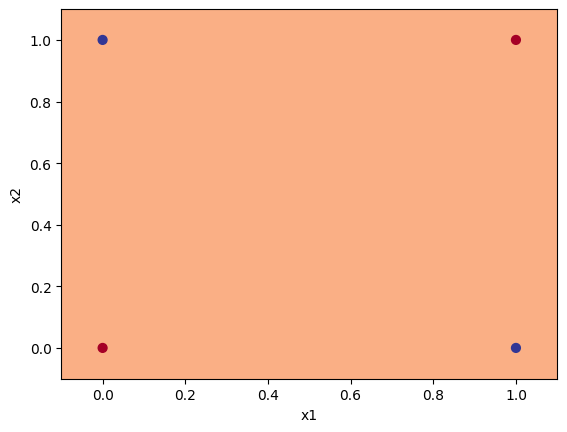

Epoch: 801/1000; Loss: 0.6931471824645996
Epoch: 802/1000; Loss: 0.6931471824645996
Epoch: 803/1000; Loss: 0.6931471824645996
Epoch: 804/1000; Loss: 0.6931471824645996
Epoch: 805/1000; Loss: 0.6931471824645996
Epoch: 806/1000; Loss: 0.6931471824645996
Epoch: 807/1000; Loss: 0.6931471824645996
Epoch: 808/1000; Loss: 0.6931471824645996
Epoch: 809/1000; Loss: 0.6931471824645996
Epoch: 810/1000; Loss: 0.6931471824645996


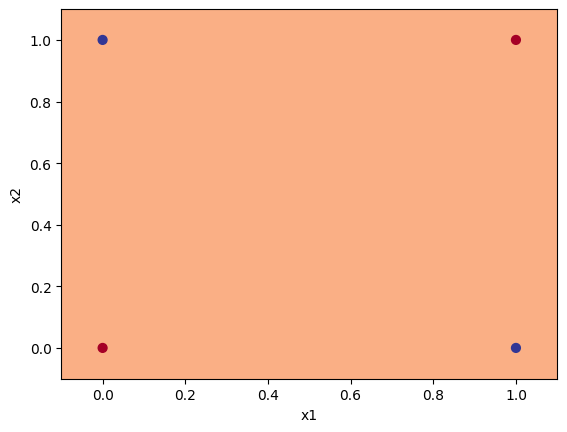

Epoch: 811/1000; Loss: 0.6931471824645996
Epoch: 812/1000; Loss: 0.6931471824645996
Epoch: 813/1000; Loss: 0.6931471824645996
Epoch: 814/1000; Loss: 0.6931471824645996
Epoch: 815/1000; Loss: 0.6931471824645996
Epoch: 816/1000; Loss: 0.6931471824645996
Epoch: 817/1000; Loss: 0.6931471824645996
Epoch: 818/1000; Loss: 0.6931471824645996
Epoch: 819/1000; Loss: 0.6931471824645996
Epoch: 820/1000; Loss: 0.6931471824645996


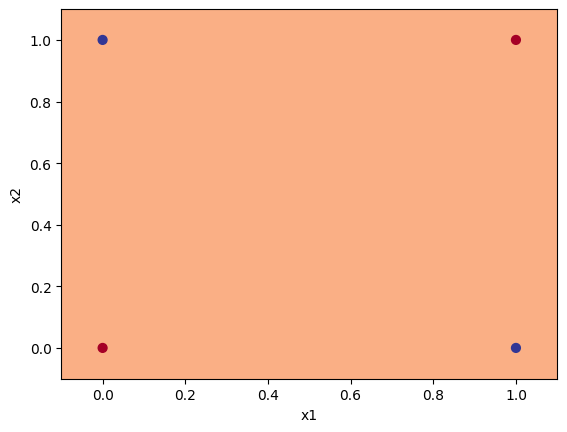

Epoch: 821/1000; Loss: 0.6931471824645996
Epoch: 822/1000; Loss: 0.6931471824645996
Epoch: 823/1000; Loss: 0.6931471824645996
Epoch: 824/1000; Loss: 0.6931471824645996
Epoch: 825/1000; Loss: 0.6931471824645996
Epoch: 826/1000; Loss: 0.6931471824645996
Epoch: 827/1000; Loss: 0.6931471824645996
Epoch: 828/1000; Loss: 0.6931471824645996
Epoch: 829/1000; Loss: 0.6931471824645996
Epoch: 830/1000; Loss: 0.6931471824645996


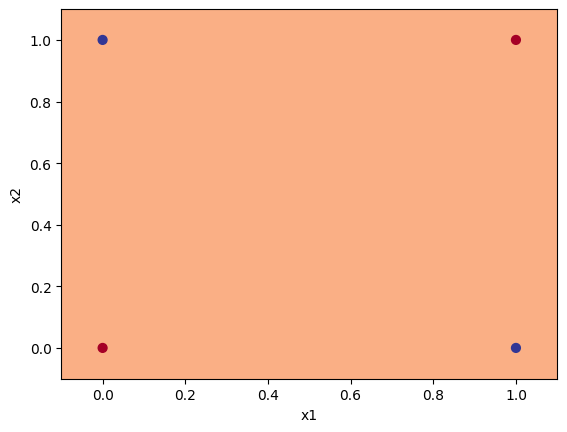

Epoch: 831/1000; Loss: 0.6931471824645996
Epoch: 832/1000; Loss: 0.6931471824645996
Epoch: 833/1000; Loss: 0.6931471824645996
Epoch: 834/1000; Loss: 0.6931471824645996
Epoch: 835/1000; Loss: 0.6931471824645996
Epoch: 836/1000; Loss: 0.6931471824645996
Epoch: 837/1000; Loss: 0.6931471824645996
Epoch: 838/1000; Loss: 0.6931471824645996
Epoch: 839/1000; Loss: 0.6931471824645996
Epoch: 840/1000; Loss: 0.6931471824645996


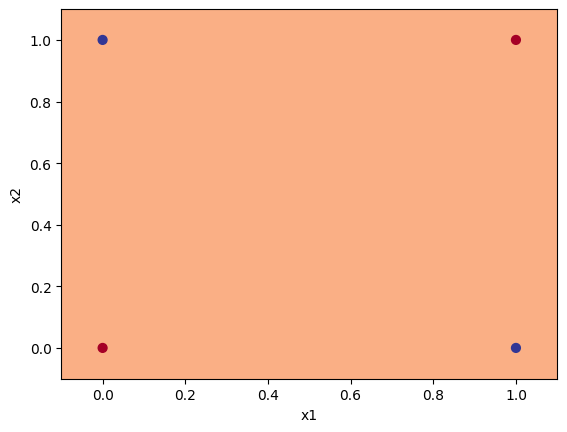

Epoch: 841/1000; Loss: 0.6931471824645996
Epoch: 842/1000; Loss: 0.6931471824645996
Epoch: 843/1000; Loss: 0.6931471824645996
Epoch: 844/1000; Loss: 0.6931471824645996
Epoch: 845/1000; Loss: 0.6931471824645996
Epoch: 846/1000; Loss: 0.6931471824645996
Epoch: 847/1000; Loss: 0.6931471824645996
Epoch: 848/1000; Loss: 0.6931471824645996
Epoch: 849/1000; Loss: 0.6931471824645996
Epoch: 850/1000; Loss: 0.6931471824645996


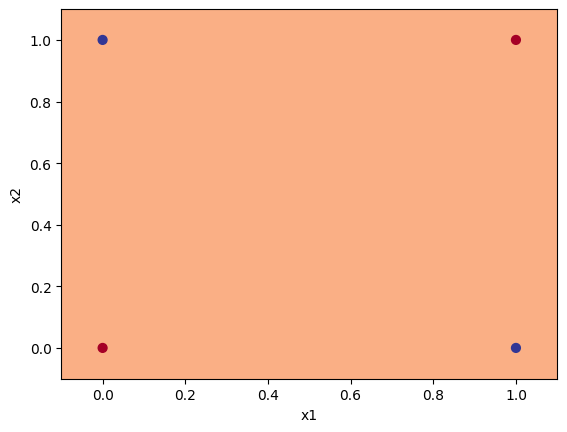

Epoch: 851/1000; Loss: 0.6931471824645996
Epoch: 852/1000; Loss: 0.6931471824645996
Epoch: 853/1000; Loss: 0.6931471824645996
Epoch: 854/1000; Loss: 0.6931471824645996
Epoch: 855/1000; Loss: 0.6931471824645996
Epoch: 856/1000; Loss: 0.6931471824645996
Epoch: 857/1000; Loss: 0.6931471824645996
Epoch: 858/1000; Loss: 0.6931471824645996
Epoch: 859/1000; Loss: 0.6931471824645996
Epoch: 860/1000; Loss: 0.6931471824645996


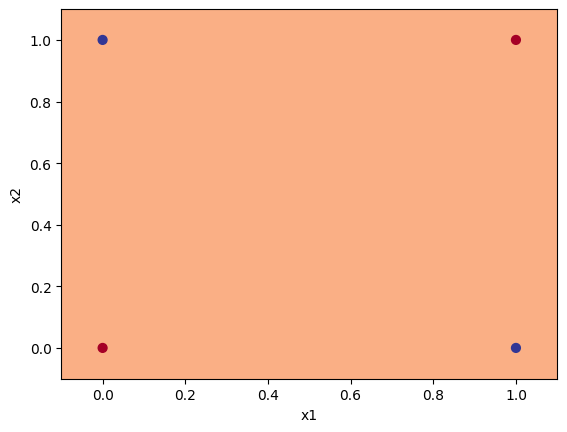

Epoch: 861/1000; Loss: 0.6931471824645996
Epoch: 862/1000; Loss: 0.6931471824645996
Epoch: 863/1000; Loss: 0.6931471824645996
Epoch: 864/1000; Loss: 0.6931471824645996
Epoch: 865/1000; Loss: 0.6931471824645996
Epoch: 866/1000; Loss: 0.6931471824645996
Epoch: 867/1000; Loss: 0.6931471824645996
Epoch: 868/1000; Loss: 0.6931471824645996
Epoch: 869/1000; Loss: 0.6931471824645996
Epoch: 870/1000; Loss: 0.6931471824645996


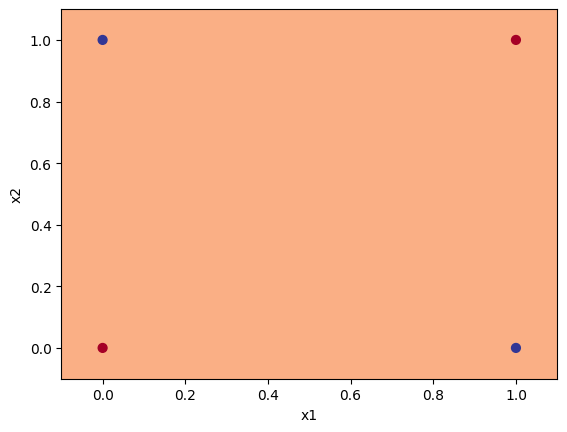

Epoch: 871/1000; Loss: 0.6931471824645996
Epoch: 872/1000; Loss: 0.6931471824645996
Epoch: 873/1000; Loss: 0.6931471824645996
Epoch: 874/1000; Loss: 0.6931471824645996
Epoch: 875/1000; Loss: 0.6931471824645996
Epoch: 876/1000; Loss: 0.6931471824645996
Epoch: 877/1000; Loss: 0.6931471824645996
Epoch: 878/1000; Loss: 0.6931471824645996
Epoch: 879/1000; Loss: 0.6931471824645996
Epoch: 880/1000; Loss: 0.6931471824645996


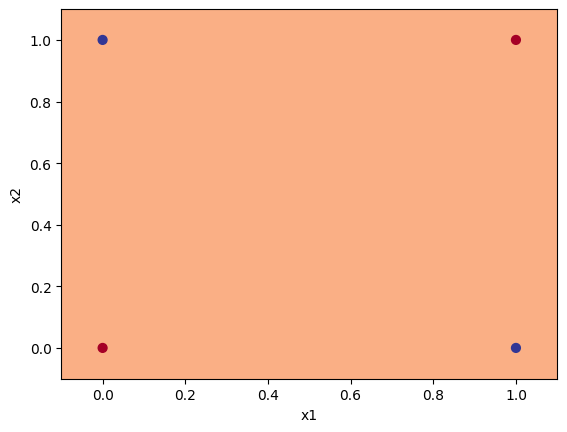

Epoch: 881/1000; Loss: 0.6931471824645996
Epoch: 882/1000; Loss: 0.6931471824645996
Epoch: 883/1000; Loss: 0.6931471824645996
Epoch: 884/1000; Loss: 0.6931471824645996
Epoch: 885/1000; Loss: 0.6931471824645996
Epoch: 886/1000; Loss: 0.6931471824645996
Epoch: 887/1000; Loss: 0.6931471824645996
Epoch: 888/1000; Loss: 0.6931471824645996
Epoch: 889/1000; Loss: 0.6931471824645996
Epoch: 890/1000; Loss: 0.6931471824645996


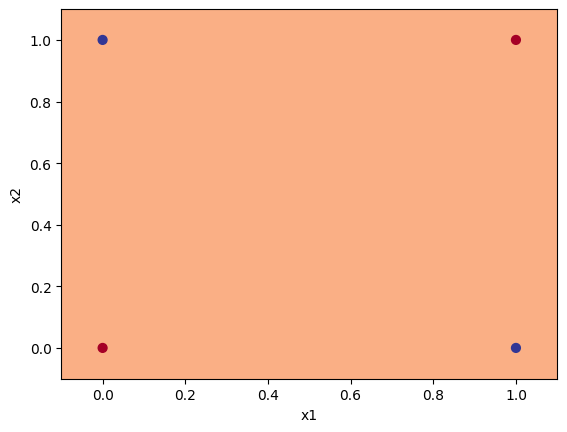

Epoch: 891/1000; Loss: 0.6931471824645996
Epoch: 892/1000; Loss: 0.6931471824645996
Epoch: 893/1000; Loss: 0.6931471824645996
Epoch: 894/1000; Loss: 0.6931471824645996
Epoch: 895/1000; Loss: 0.6931471824645996
Epoch: 896/1000; Loss: 0.6931471824645996
Epoch: 897/1000; Loss: 0.6931471824645996
Epoch: 898/1000; Loss: 0.6931471824645996
Epoch: 899/1000; Loss: 0.6931471824645996
Epoch: 900/1000; Loss: 0.6931471824645996


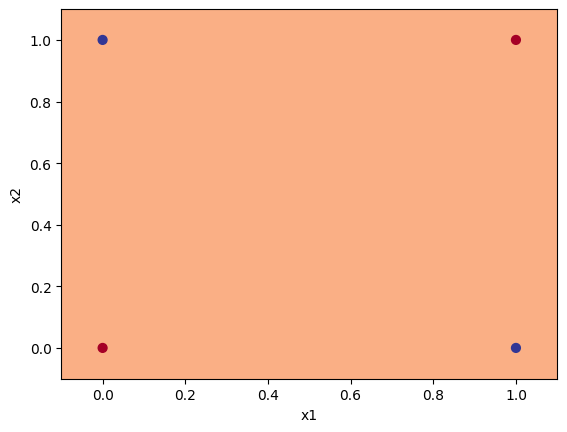

Epoch: 901/1000; Loss: 0.6931471824645996
Epoch: 902/1000; Loss: 0.6931471824645996
Epoch: 903/1000; Loss: 0.6931471824645996
Epoch: 904/1000; Loss: 0.6931471824645996
Epoch: 905/1000; Loss: 0.6931471824645996
Epoch: 906/1000; Loss: 0.6931471824645996
Epoch: 907/1000; Loss: 0.6931471824645996
Epoch: 908/1000; Loss: 0.6931471824645996
Epoch: 909/1000; Loss: 0.6931471824645996
Epoch: 910/1000; Loss: 0.6931471824645996


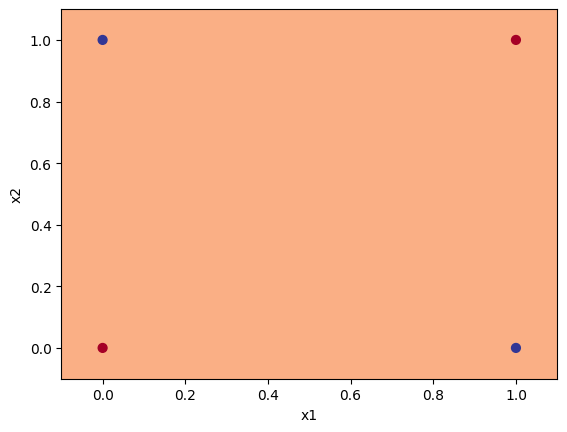

Epoch: 911/1000; Loss: 0.6931471824645996
Epoch: 912/1000; Loss: 0.6931471824645996
Epoch: 913/1000; Loss: 0.6931471824645996
Epoch: 914/1000; Loss: 0.6931471824645996
Epoch: 915/1000; Loss: 0.6931471824645996
Epoch: 916/1000; Loss: 0.6931471824645996
Epoch: 917/1000; Loss: 0.6931471824645996
Epoch: 918/1000; Loss: 0.6931471824645996
Epoch: 919/1000; Loss: 0.6931471824645996
Epoch: 920/1000; Loss: 0.6931471824645996


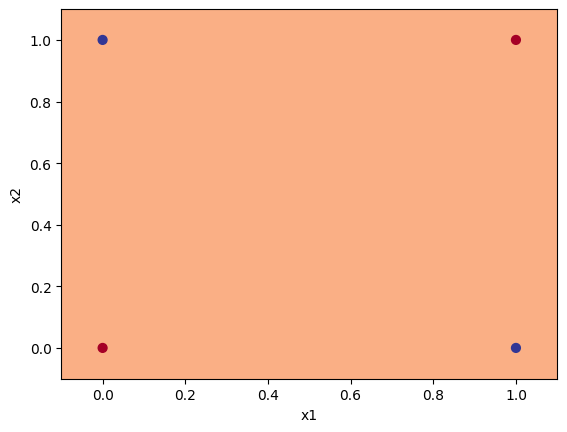

Epoch: 921/1000; Loss: 0.6931471824645996
Epoch: 922/1000; Loss: 0.6931471824645996
Epoch: 923/1000; Loss: 0.6931471824645996
Epoch: 924/1000; Loss: 0.6931471824645996
Epoch: 925/1000; Loss: 0.6931471824645996
Epoch: 926/1000; Loss: 0.6931471824645996
Epoch: 927/1000; Loss: 0.6931471824645996
Epoch: 928/1000; Loss: 0.6931471824645996
Epoch: 929/1000; Loss: 0.6931471824645996
Epoch: 930/1000; Loss: 0.6931471824645996


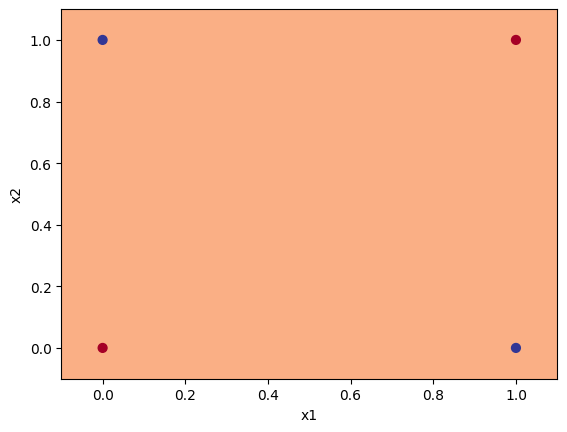

Epoch: 931/1000; Loss: 0.6931471824645996
Epoch: 932/1000; Loss: 0.6931471824645996
Epoch: 933/1000; Loss: 0.6931471824645996
Epoch: 934/1000; Loss: 0.6931471824645996
Epoch: 935/1000; Loss: 0.6931471824645996
Epoch: 936/1000; Loss: 0.6931471824645996
Epoch: 937/1000; Loss: 0.6931471824645996
Epoch: 938/1000; Loss: 0.6931471824645996
Epoch: 939/1000; Loss: 0.6931471824645996
Epoch: 940/1000; Loss: 0.6931471824645996


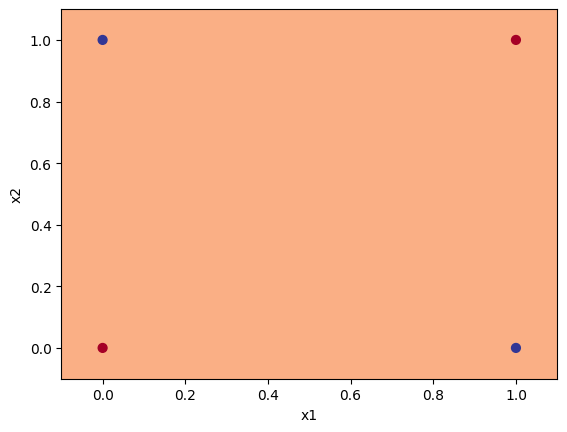

Epoch: 941/1000; Loss: 0.6931471824645996
Epoch: 942/1000; Loss: 0.6931471824645996
Epoch: 943/1000; Loss: 0.6931471824645996
Epoch: 944/1000; Loss: 0.6931471824645996
Epoch: 945/1000; Loss: 0.6931471824645996
Epoch: 946/1000; Loss: 0.6931471824645996
Epoch: 947/1000; Loss: 0.6931471824645996
Epoch: 948/1000; Loss: 0.6931471824645996
Epoch: 949/1000; Loss: 0.6931471824645996
Epoch: 950/1000; Loss: 0.6931471824645996


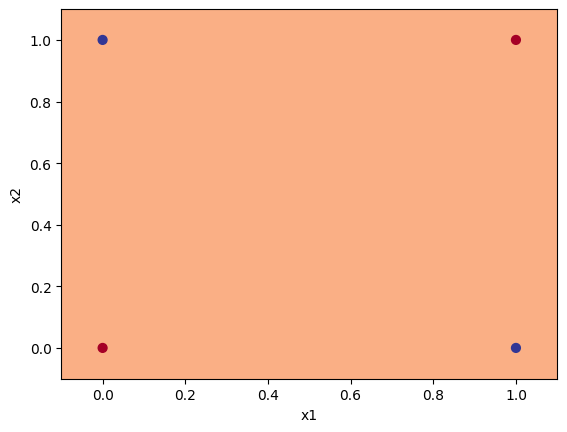

Epoch: 951/1000; Loss: 0.6931471824645996
Epoch: 952/1000; Loss: 0.6931471824645996
Epoch: 953/1000; Loss: 0.6931471824645996
Epoch: 954/1000; Loss: 0.6931471824645996
Epoch: 955/1000; Loss: 0.6931471824645996
Epoch: 956/1000; Loss: 0.6931471824645996
Epoch: 957/1000; Loss: 0.6931471824645996
Epoch: 958/1000; Loss: 0.6931471824645996
Epoch: 959/1000; Loss: 0.6931471824645996
Epoch: 960/1000; Loss: 0.6931471824645996


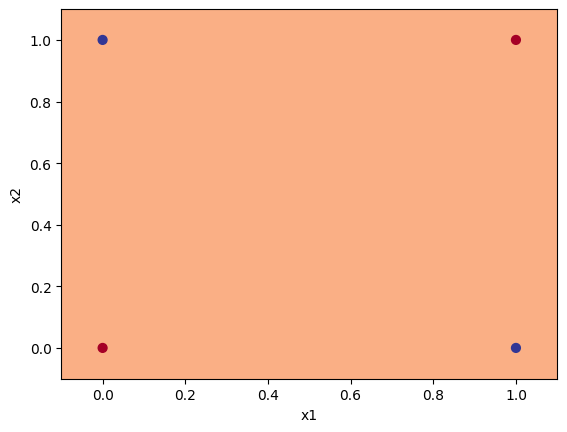

Epoch: 961/1000; Loss: 0.6931471824645996
Epoch: 962/1000; Loss: 0.6931471824645996
Epoch: 963/1000; Loss: 0.6931471824645996
Epoch: 964/1000; Loss: 0.6931471824645996
Epoch: 965/1000; Loss: 0.6931471824645996
Epoch: 966/1000; Loss: 0.6931471824645996
Epoch: 967/1000; Loss: 0.6931471824645996
Epoch: 968/1000; Loss: 0.6931471824645996
Epoch: 969/1000; Loss: 0.6931471824645996
Epoch: 970/1000; Loss: 0.6931471824645996


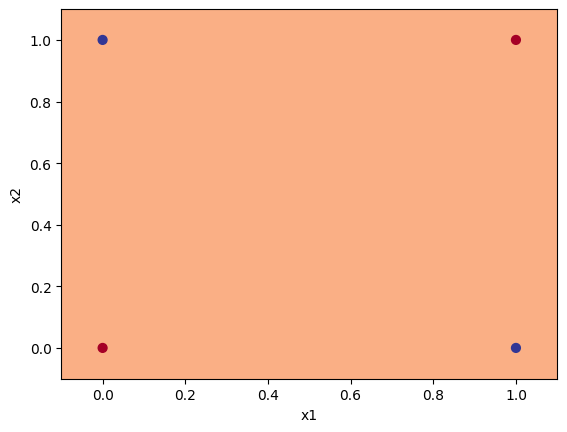

Epoch: 971/1000; Loss: 0.6931471824645996
Epoch: 972/1000; Loss: 0.6931471824645996
Epoch: 973/1000; Loss: 0.6931471824645996
Epoch: 974/1000; Loss: 0.6931471824645996
Epoch: 975/1000; Loss: 0.6931471824645996
Epoch: 976/1000; Loss: 0.6931471824645996
Epoch: 977/1000; Loss: 0.6931471824645996
Epoch: 978/1000; Loss: 0.6931471824645996
Epoch: 979/1000; Loss: 0.6931471824645996
Epoch: 980/1000; Loss: 0.6931471824645996


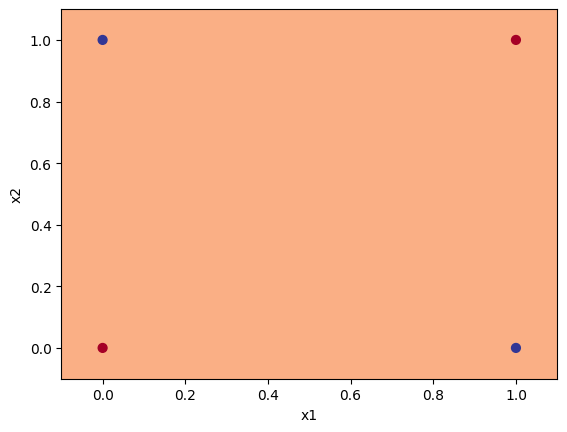

Epoch: 981/1000; Loss: 0.6931471824645996
Epoch: 982/1000; Loss: 0.6931471824645996
Epoch: 983/1000; Loss: 0.6931471824645996
Epoch: 984/1000; Loss: 0.6931471824645996
Epoch: 985/1000; Loss: 0.6931471824645996
Epoch: 986/1000; Loss: 0.6931471824645996
Epoch: 987/1000; Loss: 0.6931471824645996
Epoch: 988/1000; Loss: 0.6931471824645996
Epoch: 989/1000; Loss: 0.6931471824645996
Epoch: 990/1000; Loss: 0.6931471824645996


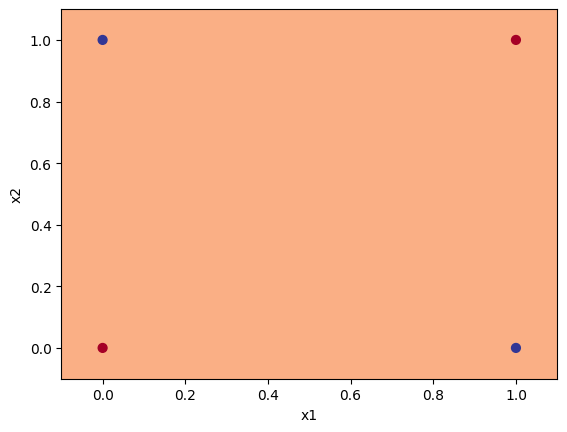

Epoch: 991/1000; Loss: 0.6931471824645996
Epoch: 992/1000; Loss: 0.6931471824645996
Epoch: 993/1000; Loss: 0.6931471824645996
Epoch: 994/1000; Loss: 0.6931471824645996
Epoch: 995/1000; Loss: 0.6931471824645996
Epoch: 996/1000; Loss: 0.6931471824645996
Epoch: 997/1000; Loss: 0.6931471824645996
Epoch: 998/1000; Loss: 0.6931471824645996
Epoch: 999/1000; Loss: 0.6931471824645996


In [176]:
so_so_model2 = Perceptron(input_size=2)
so_so_model2 = train(so_so_model2, X, Y_XOR)

In [177]:
test(so_so_model2, X, Y_XOR)

[0, 0] -> 0
[0, 1] -> 0
[1, 0] -> 0
[1, 1] -> 0
Test result: 2/4


Эта идея **не увенчалась успехом**

### 3. Создаём модель поумнее, пробуем научить исключающему ИЛИ

In [178]:
class StrongPerceptron(nn.Module):
    def __init__(self, input_size):
        super(StrongPerceptron, self).__init__()
        self.l1 = nn.Linear(input_size, 2) # тут у нас уже два слоя и три нейрона
        self.l2 = nn.Linear(input_size, 1)

    def forward(self, x):
      z1 = self.l1(x)
      p1 = torch.sigmoid(z1)
      z2 = self.l2(p1)
      p2 = torch.sigmoid(z2)
      return p2

Epoch: 0/5000; Loss: 0.6959502100944519


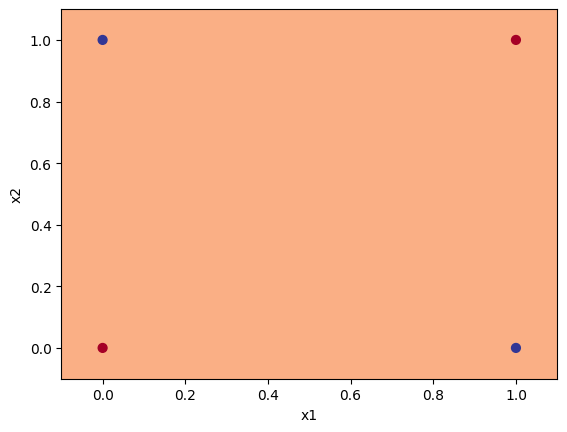

Epoch: 1/5000; Loss: 0.6954175233840942
Epoch: 2/5000; Loss: 0.6949834823608398
Epoch: 3/5000; Loss: 0.6946502923965454
Epoch: 4/5000; Loss: 0.6944147348403931
Epoch: 5/5000; Loss: 0.6942654252052307
Epoch: 6/5000; Loss: 0.6941824555397034
Epoch: 7/5000; Loss: 0.6941428184509277
Epoch: 8/5000; Loss: 0.6941244006156921
Epoch: 9/5000; Loss: 0.6941085457801819
Epoch: 10/5000; Loss: 0.6940821409225464


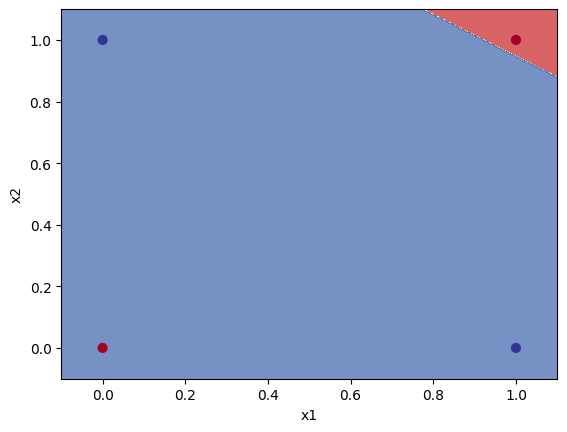

Epoch: 11/5000; Loss: 0.6940385103225708
Epoch: 12/5000; Loss: 0.6939771175384521
Epoch: 13/5000; Loss: 0.6939020156860352
Epoch: 14/5000; Loss: 0.6938193440437317
Epoch: 15/5000; Loss: 0.6937362551689148
Epoch: 16/5000; Loss: 0.6936588287353516
Epoch: 17/5000; Loss: 0.6935920715332031
Epoch: 18/5000; Loss: 0.6935386657714844
Epoch: 19/5000; Loss: 0.693498969078064
Epoch: 20/5000; Loss: 0.6934714913368225


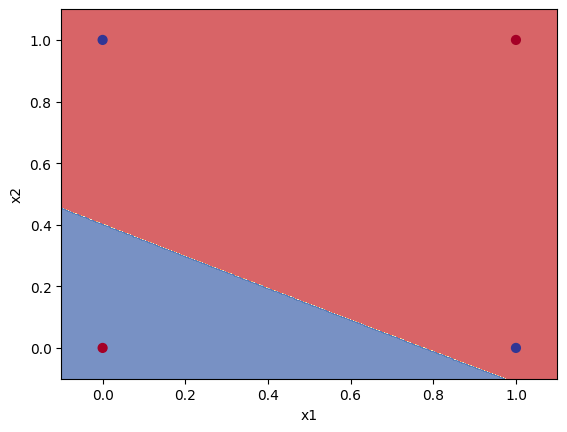

Epoch: 21/5000; Loss: 0.6934531331062317
Epoch: 22/5000; Loss: 0.6934400200843811
Epoch: 23/5000; Loss: 0.6934283971786499
Epoch: 24/5000; Loss: 0.6934151649475098
Epoch: 25/5000; Loss: 0.6933984756469727
Epoch: 26/5000; Loss: 0.6933780908584595
Epoch: 27/5000; Loss: 0.6933549046516418
Epoch: 28/5000; Loss: 0.6933305263519287
Epoch: 29/5000; Loss: 0.6933070421218872
Epoch: 30/5000; Loss: 0.693286120891571


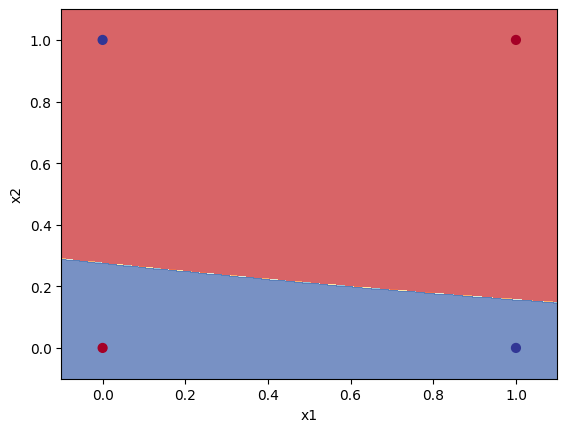

Epoch: 31/5000; Loss: 0.6932693719863892
Epoch: 32/5000; Loss: 0.6932568550109863
Epoch: 33/5000; Loss: 0.6932483911514282
Epoch: 34/5000; Loss: 0.6932432055473328
Epoch: 35/5000; Loss: 0.6932395696640015
Epoch: 36/5000; Loss: 0.693236231803894
Epoch: 37/5000; Loss: 0.6932321786880493
Epoch: 38/5000; Loss: 0.6932268142700195
Epoch: 39/5000; Loss: 0.6932202577590942
Epoch: 40/5000; Loss: 0.6932129263877869


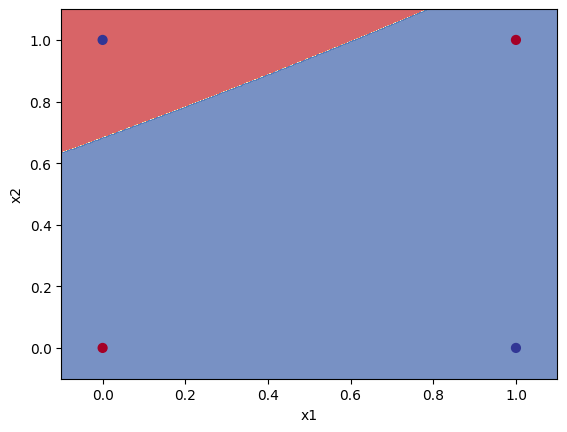

Epoch: 41/5000; Loss: 0.6932055950164795
Epoch: 42/5000; Loss: 0.6931989789009094
Epoch: 43/5000; Loss: 0.6931936740875244
Epoch: 44/5000; Loss: 0.6931897401809692
Epoch: 45/5000; Loss: 0.6931872367858887
Epoch: 46/5000; Loss: 0.693185567855835
Epoch: 47/5000; Loss: 0.6931842565536499
Epoch: 48/5000; Loss: 0.6931829452514648
Epoch: 49/5000; Loss: 0.6931811571121216
Epoch: 50/5000; Loss: 0.6931787729263306


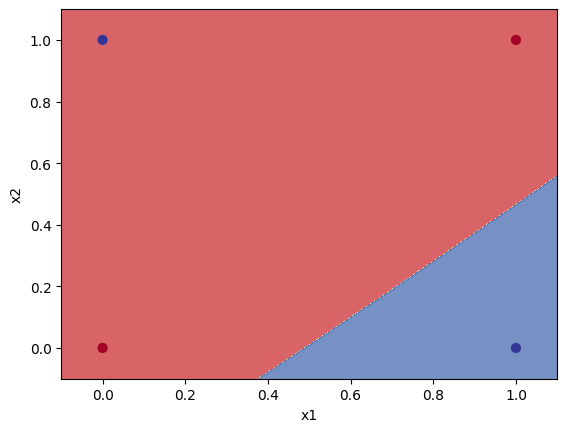

Epoch: 51/5000; Loss: 0.6931760311126709
Epoch: 52/5000; Loss: 0.6931731104850769
Epoch: 53/5000; Loss: 0.6931702494621277
Epoch: 54/5000; Loss: 0.6931677460670471
Epoch: 55/5000; Loss: 0.6931657791137695
Epoch: 56/5000; Loss: 0.6931643486022949
Epoch: 57/5000; Loss: 0.6931631565093994
Epoch: 58/5000; Loss: 0.6931620836257935
Epoch: 59/5000; Loss: 0.6931610703468323
Epoch: 60/5000; Loss: 0.6931597590446472


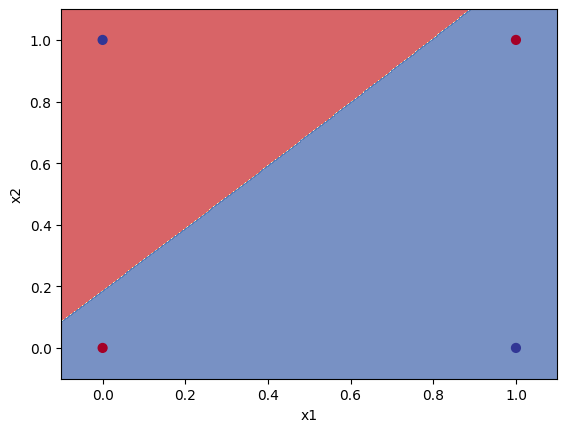

Epoch: 61/5000; Loss: 0.6931582689285278
Epoch: 62/5000; Loss: 0.6931567192077637
Epoch: 63/5000; Loss: 0.69315505027771
Epoch: 64/5000; Loss: 0.6931533813476562
Epoch: 65/5000; Loss: 0.6931519508361816
Epoch: 66/5000; Loss: 0.6931506395339966
Epoch: 67/5000; Loss: 0.6931494474411011
Epoch: 68/5000; Loss: 0.6931484341621399
Epoch: 69/5000; Loss: 0.6931473016738892
Epoch: 70/5000; Loss: 0.6931462287902832


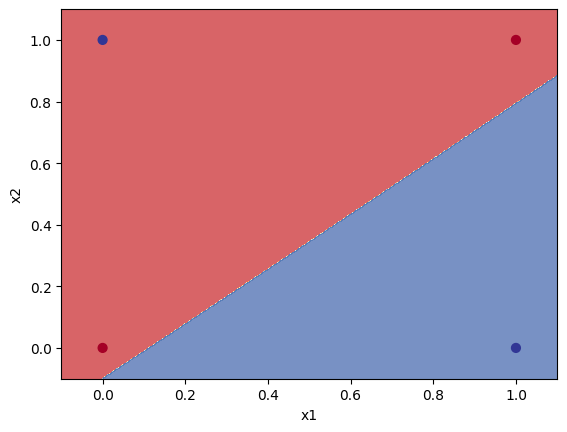

Epoch: 71/5000; Loss: 0.6931450366973877
Epoch: 72/5000; Loss: 0.6931437253952026
Epoch: 73/5000; Loss: 0.6931423544883728
Epoch: 74/5000; Loss: 0.693140983581543
Epoch: 75/5000; Loss: 0.6931395530700684
Epoch: 76/5000; Loss: 0.6931382417678833
Epoch: 77/5000; Loss: 0.693136990070343
Epoch: 78/5000; Loss: 0.6931357383728027
Epoch: 79/5000; Loss: 0.6931343674659729
Epoch: 80/5000; Loss: 0.6931329965591431


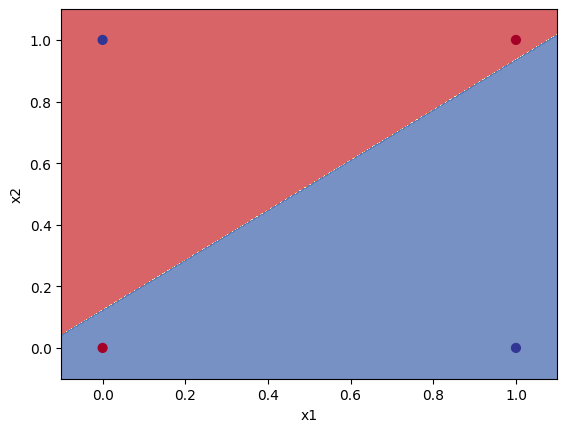

Epoch: 81/5000; Loss: 0.6931315660476685
Epoch: 82/5000; Loss: 0.6931300163269043
Epoch: 83/5000; Loss: 0.6931283473968506
Epoch: 84/5000; Loss: 0.6931266784667969
Epoch: 85/5000; Loss: 0.6931250095367432
Epoch: 86/5000; Loss: 0.6931231617927551
Epoch: 87/5000; Loss: 0.6931213140487671
Epoch: 88/5000; Loss: 0.6931194067001343
Epoch: 89/5000; Loss: 0.6931173205375671
Epoch: 90/5000; Loss: 0.6931151151657104


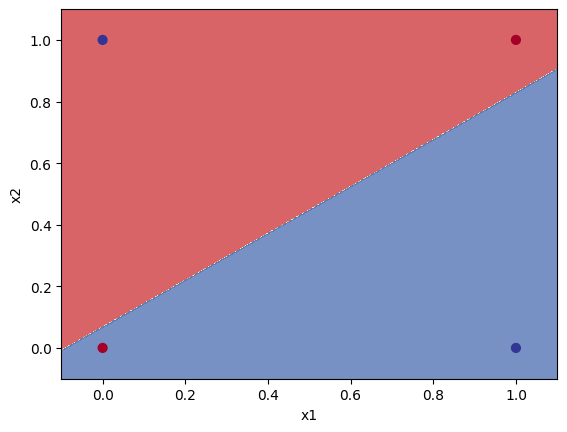

Epoch: 91/5000; Loss: 0.6931127309799194
Epoch: 92/5000; Loss: 0.6931102275848389
Epoch: 93/5000; Loss: 0.6931076049804688
Epoch: 94/5000; Loss: 0.6931046843528748
Epoch: 95/5000; Loss: 0.693101704120636
Epoch: 96/5000; Loss: 0.6930985450744629
Epoch: 97/5000; Loss: 0.6930950284004211
Epoch: 98/5000; Loss: 0.6930913329124451
Epoch: 99/5000; Loss: 0.6930872797966003
Epoch: 100/5000; Loss: 0.6930830478668213


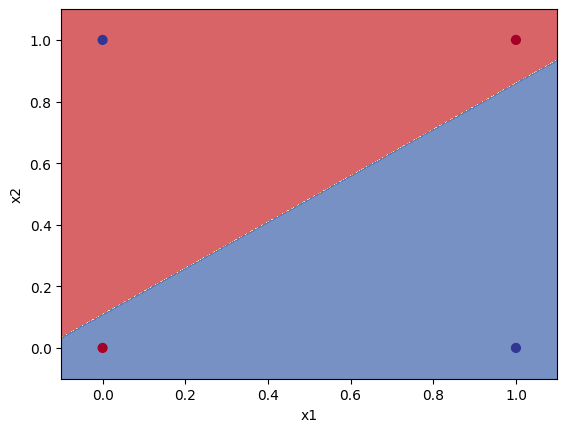

Epoch: 101/5000; Loss: 0.6930783987045288
Epoch: 102/5000; Loss: 0.6930733323097229
Epoch: 103/5000; Loss: 0.6930678486824036
Epoch: 104/5000; Loss: 0.6930619478225708
Epoch: 105/5000; Loss: 0.6930555701255798
Epoch: 106/5000; Loss: 0.6930485963821411
Epoch: 107/5000; Loss: 0.6930410861968994
Epoch: 108/5000; Loss: 0.6930326819419861
Epoch: 109/5000; Loss: 0.693023681640625
Epoch: 110/5000; Loss: 0.6930137872695923


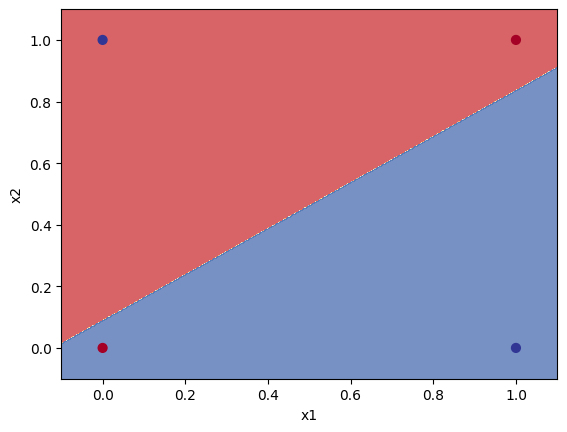

Epoch: 111/5000; Loss: 0.6930028796195984
Epoch: 112/5000; Loss: 0.6929908990859985
Epoch: 113/5000; Loss: 0.692977786064148
Epoch: 114/5000; Loss: 0.6929633617401123
Epoch: 115/5000; Loss: 0.692947506904602
Epoch: 116/5000; Loss: 0.6929298639297485
Epoch: 117/5000; Loss: 0.6929105520248413
Epoch: 118/5000; Loss: 0.6928890943527222
Epoch: 119/5000; Loss: 0.6928653717041016
Epoch: 120/5000; Loss: 0.6928390264511108


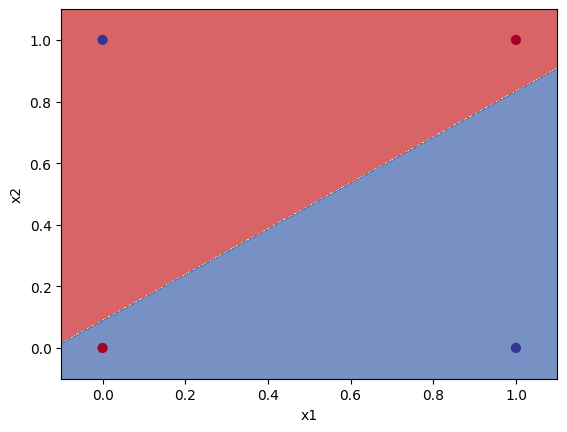

Epoch: 121/5000; Loss: 0.6928098201751709
Epoch: 122/5000; Loss: 0.6927774548530579
Epoch: 123/5000; Loss: 0.6927415132522583
Epoch: 124/5000; Loss: 0.692701518535614
Epoch: 125/5000; Loss: 0.6926571130752563
Epoch: 126/5000; Loss: 0.6926077008247375
Epoch: 127/5000; Loss: 0.692552924156189
Epoch: 128/5000; Loss: 0.6924919486045837
Epoch: 129/5000; Loss: 0.6924242377281189
Epoch: 130/5000; Loss: 0.6923491954803467


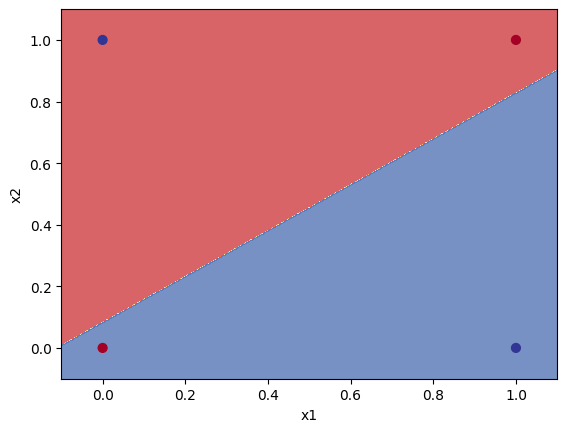

Epoch: 131/5000; Loss: 0.6922659873962402
Epoch: 132/5000; Loss: 0.6921738386154175
Epoch: 133/5000; Loss: 0.6920720338821411
Epoch: 134/5000; Loss: 0.6919597387313843
Epoch: 135/5000; Loss: 0.691835880279541
Epoch: 136/5000; Loss: 0.6916998624801636
Epoch: 137/5000; Loss: 0.6915503740310669
Epoch: 138/5000; Loss: 0.6913868188858032
Epoch: 139/5000; Loss: 0.6912079453468323
Epoch: 140/5000; Loss: 0.691012978553772


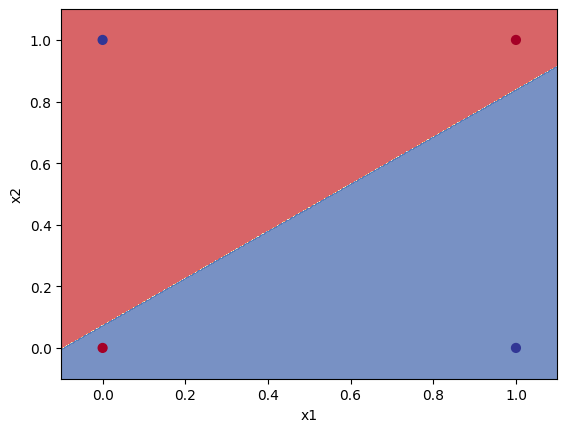

Epoch: 141/5000; Loss: 0.6908007264137268
Epoch: 142/5000; Loss: 0.6905702948570251
Epoch: 143/5000; Loss: 0.690320611000061
Epoch: 144/5000; Loss: 0.690050482749939
Epoch: 145/5000; Loss: 0.6897587776184082
Epoch: 146/5000; Loss: 0.6894447207450867
Epoch: 147/5000; Loss: 0.6891069412231445
Epoch: 148/5000; Loss: 0.6887444257736206
Epoch: 149/5000; Loss: 0.6883561015129089
Epoch: 150/5000; Loss: 0.6879408359527588


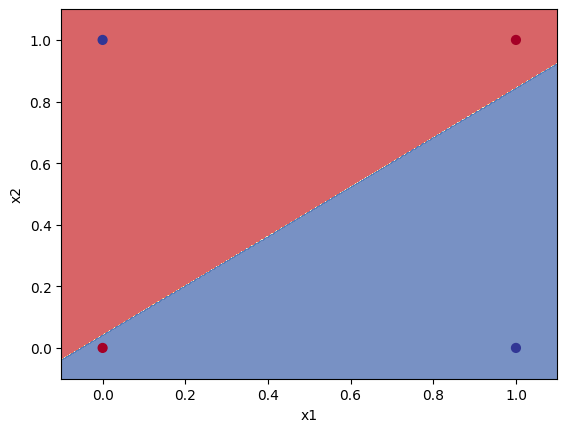

Epoch: 151/5000; Loss: 0.687497615814209
Epoch: 152/5000; Loss: 0.6870254278182983
Epoch: 153/5000; Loss: 0.6865234971046448
Epoch: 154/5000; Loss: 0.6859908103942871
Epoch: 155/5000; Loss: 0.6854267716407776
Epoch: 156/5000; Loss: 0.6848306655883789
Epoch: 157/5000; Loss: 0.6842020750045776
Epoch: 158/5000; Loss: 0.6835403442382812
Epoch: 159/5000; Loss: 0.6828453540802002
Epoch: 160/5000; Loss: 0.6821169257164001


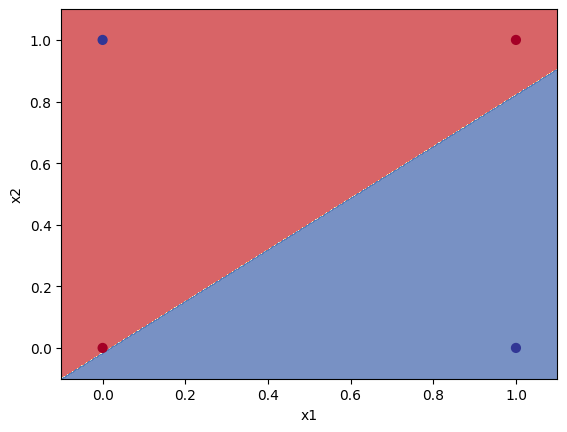

Epoch: 161/5000; Loss: 0.681354820728302
Epoch: 162/5000; Loss: 0.6805592179298401
Epoch: 163/5000; Loss: 0.6797299385070801
Epoch: 164/5000; Loss: 0.6788672208786011
Epoch: 165/5000; Loss: 0.677971363067627
Epoch: 166/5000; Loss: 0.6770422458648682
Epoch: 167/5000; Loss: 0.6760802865028381
Epoch: 168/5000; Loss: 0.6750856637954712
Epoch: 169/5000; Loss: 0.6740585565567017
Epoch: 170/5000; Loss: 0.6729990243911743


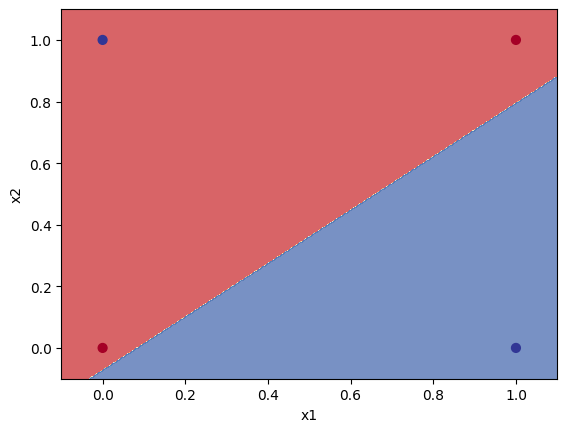

Epoch: 171/5000; Loss: 0.6719071865081787
Epoch: 172/5000; Loss: 0.6707830429077148
Epoch: 173/5000; Loss: 0.6696264147758484
Epoch: 174/5000; Loss: 0.668437123298645
Epoch: 175/5000; Loss: 0.6672146320343018
Epoch: 176/5000; Loss: 0.6659585237503052
Epoch: 177/5000; Loss: 0.6646679639816284
Epoch: 178/5000; Loss: 0.6633419990539551
Epoch: 179/5000; Loss: 0.6619794964790344
Epoch: 180/5000; Loss: 0.6605789661407471


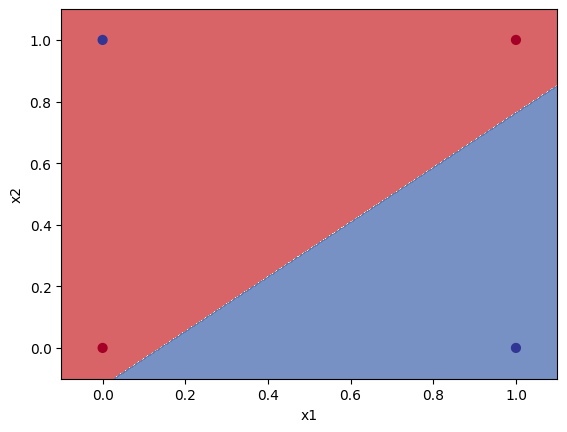

Epoch: 181/5000; Loss: 0.6591387987136841
Epoch: 182/5000; Loss: 0.657657265663147
Epoch: 183/5000; Loss: 0.6561322808265686
Epoch: 184/5000; Loss: 0.6545616984367371
Epoch: 185/5000; Loss: 0.6529431343078613
Epoch: 186/5000; Loss: 0.6512744426727295
Epoch: 187/5000; Loss: 0.6495530605316162
Epoch: 188/5000; Loss: 0.6477768421173096
Epoch: 189/5000; Loss: 0.6459434628486633
Epoch: 190/5000; Loss: 0.6440510153770447


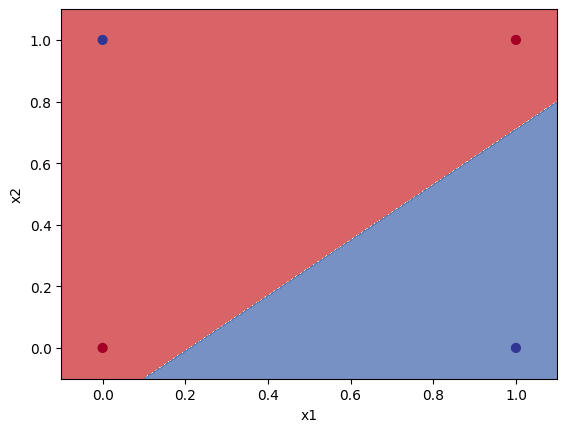

Epoch: 191/5000; Loss: 0.6420975923538208
Epoch: 192/5000; Loss: 0.6400816440582275
Epoch: 193/5000; Loss: 0.6380016803741455
Epoch: 194/5000; Loss: 0.6358569264411926
Epoch: 195/5000; Loss: 0.6336464285850525
Epoch: 196/5000; Loss: 0.6313697099685669
Epoch: 197/5000; Loss: 0.6290264129638672
Epoch: 198/5000; Loss: 0.6266165971755981
Epoch: 199/5000; Loss: 0.6241405010223389
Epoch: 200/5000; Loss: 0.6215986013412476


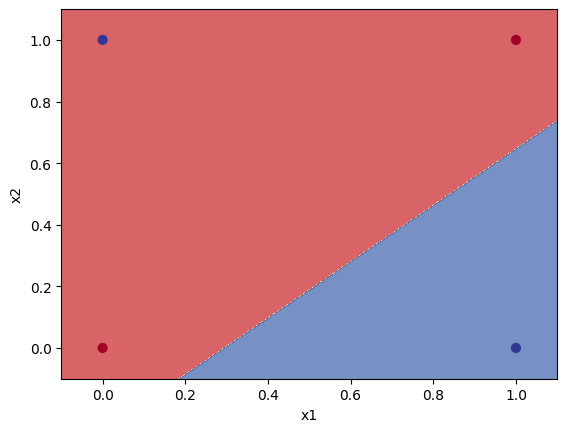

Epoch: 201/5000; Loss: 0.6189913749694824
Epoch: 202/5000; Loss: 0.6163196563720703
Epoch: 203/5000; Loss: 0.6135842800140381
Epoch: 204/5000; Loss: 0.6107861995697021
Epoch: 205/5000; Loss: 0.6079263687133789
Epoch: 206/5000; Loss: 0.6050057411193848
Epoch: 207/5000; Loss: 0.6020252704620361
Epoch: 208/5000; Loss: 0.5989859104156494
Epoch: 209/5000; Loss: 0.5958889126777649
Epoch: 210/5000; Loss: 0.5927349925041199


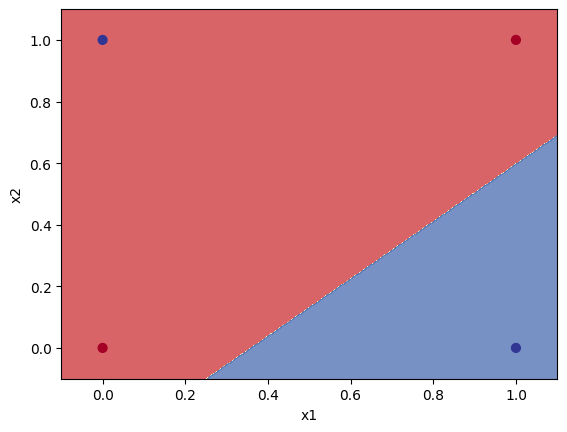

Epoch: 211/5000; Loss: 0.5895256996154785
Epoch: 212/5000; Loss: 0.5862621068954468
Epoch: 213/5000; Loss: 0.5829458236694336
Epoch: 214/5000; Loss: 0.5795787572860718
Epoch: 215/5000; Loss: 0.5761624574661255
Epoch: 216/5000; Loss: 0.5726990699768066
Epoch: 217/5000; Loss: 0.5691905617713928
Epoch: 218/5000; Loss: 0.5656391978263855
Epoch: 219/5000; Loss: 0.5620471239089966
Epoch: 220/5000; Loss: 0.5584166646003723


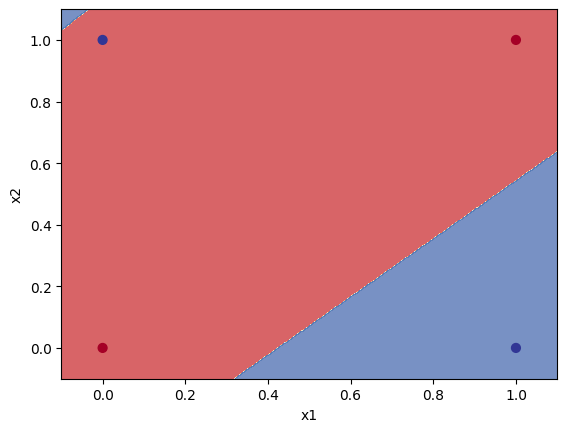

Epoch: 221/5000; Loss: 0.5547499656677246
Epoch: 222/5000; Loss: 0.5510492920875549
Epoch: 223/5000; Loss: 0.5473170280456543
Epoch: 224/5000; Loss: 0.5435553789138794
Epoch: 225/5000; Loss: 0.5397664904594421
Epoch: 226/5000; Loss: 0.5359525680541992
Epoch: 227/5000; Loss: 0.5321158170700073
Epoch: 228/5000; Loss: 0.5282583236694336
Training completed :)


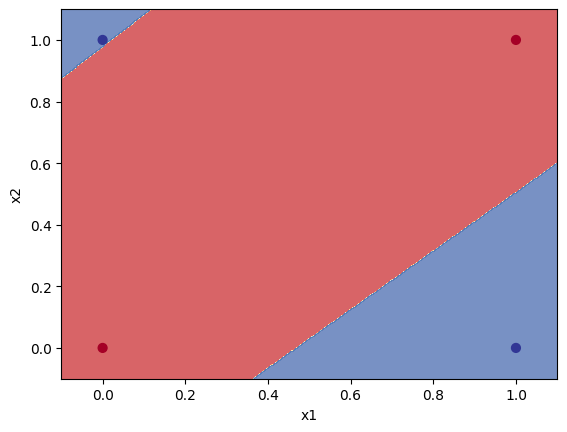

In [179]:
strong = StrongPerceptron(input_size=2)
strong = train(strong, X, Y_XOR, 5000, 0.01, True)

In [180]:
test(strong, X, Y_XOR)

[0, 0] -> 0
[0, 1] -> 1
[1, 0] -> 1
[1, 1] -> 0
Test result: 4/4


### 4. Построим график функции Softmax

In [181]:
def softmax(x: list):
  return np.exp(x)/np.sum(np.exp(x))

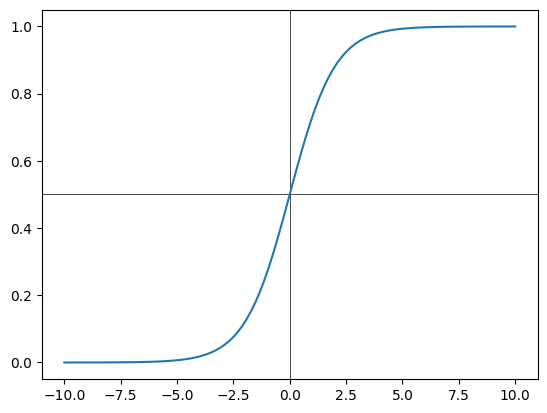

In [182]:
# хитрость в том что softmax - многомерная функция, строить график для менее чем двух аргументов бессмысленно
# чтобы получить график "как из учебника", необходимо зафиксировать значения всех аргументов (мы возьмём 2), кроме одного
xs = np.linspace(-10, 10, 100)
xs2 = np.zeros((100,))

ys = [softmax([xs[i], xs2[i]])[0] for i in range(100)]

plt.axhline(0.5, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.plot(xs, ys)
plt.show()